# Noise Analysis
In thi notebook we test the effect of noisy inputs to the model.

In [394]:

%reload_ext autoreload
%autoreload 2

from torchvision import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import ast
import os
import sys
from statistics import mean
import torch
import warnings

# import modules from RN08 model
module_path = os.path.abspath(os.path.join('../../workspace/models/rn08/code/')) # or the path to your source code
sys.path.insert(0, module_path)
import rn08



## Utility methods

In [395]:
def plot_2d_heatmap(values, 
                    title, 
                    min_max=(0, 1), 
                    x_label='Layers', 
                    y_label='Layers', 
                    scale_label='Value', 
                    cmap='Greens',
                    show_value=True):
    '''
    Method used to plot a 2D heatmap using Seaborn.
    '''
    # Set up the figure and axes
    plt.figure(figsize=(7, 6))

    # Create a heatmap using Seaborn
    sns.heatmap(values, 
                cmap=cmap, 
                annot=show_value, 
                fmt=".2f", 
                vmin=min_max[0], 
                vmax=min_max[1],
                cbar_kws={'label': scale_label})

    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the plot
    plt.show()
    
def read_file(path):
    
    try:
        emd_file = open(path)
        emd_text = emd_file.read()
        emd_file.close()
        if not emd_text.startswith('['):
            return float(emd_text)
        emd = ast.literal_eval(emd_text)
        return emd[0]['AVG_EMD']
        
    except Exception as e:
        warnings.warn("Warning: " + path + " not found!")
        


In [396]:
# search space
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.0001, 0.00001, 0.000001, 0.0000001]
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [397]:
def get_emd(path, batch_size, learning_rate, precision, size, num_tests=3):
    EMDs = []

    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    for i in range(1, num_tests + 1):
        file_path = os.path.join(
            path, 
            f'bs{batch_size}_lr{lr}/ECON_{precision}b/{size}/{size}_emd_{i}.txt'
        )
        try:
            with open(file_path) as emd_file:
                emd_text = emd_file.read()
                emd_data = ast.literal_eval(emd_text)
                emd = emd_data[0]['AVG_EMD']
                EMDs.append(emd)
        except FileNotFoundError:
            continue
        except Exception as e:
            warnings.warn(f"An error occurred while processing {file_path}: {e}")
            continue
    
    if not EMDs:
        warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
        return -1
    
    return mean(EMDs)


def get_emd_with_noise(path, batch_size, learning_rate, precision, size, noise_type, percentage):
    '''
    Return the EMD achieved by the Model with a certain level of noise
    '''
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    file_path = os.path.join(
                path,
                f'bs{batch_size}_lr{lr}/' \
                f'ECON_{precision}b/{size}/emd_{noise_type}_{percentage}.txt'
        ) 
    noise_emd = -1
    try:
        emd_file = open(file_path)
        emd_text = emd_file.read()
        if not emd_text.startswith('['):
            noise_emd = float(emd_text)
        else:
            emd = ast.literal_eval(emd_text)
            noise_emd = emd[0]['AVG_EMD']
        emd_file.close()
    except Exception as e:
        # warnings.warn("Warning: " + file_path + " not found!")
        return -1
    return noise_emd

# ECON model (Autoencoder)
we focus our analysis on the encoder which will be deploy on an ASIC.

In [398]:
DATA_PATH = '/data/tbaldi/work/checkpoint/'
DATASET_DIR = '../../data/ECON/Elegun'
DATASET_FILE = 'nELinks5.npy'

size = 'baseline'

## EMD results

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py

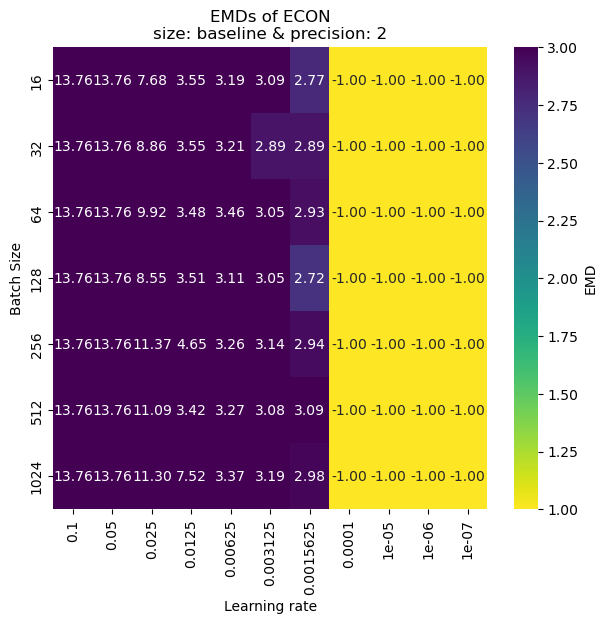

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


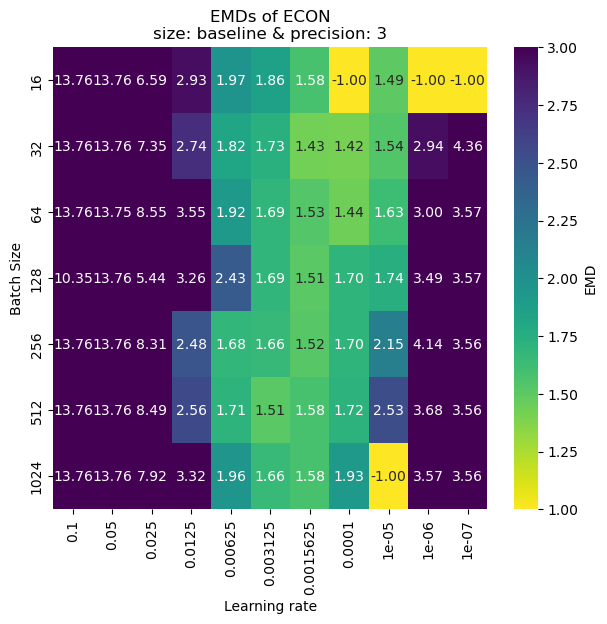

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


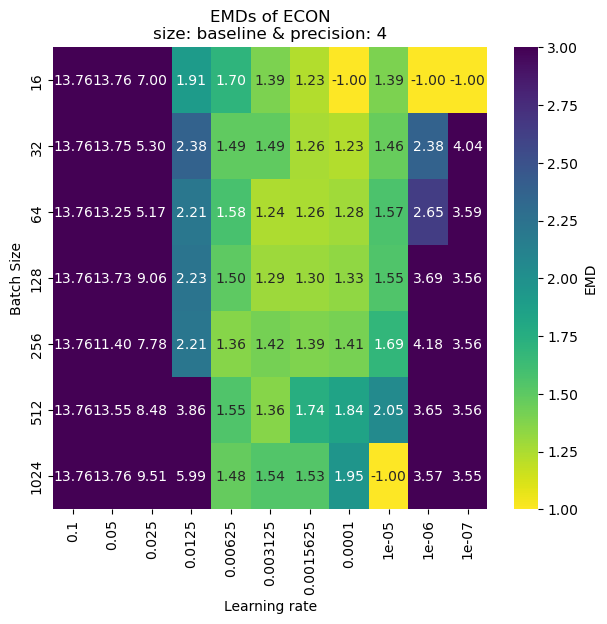

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


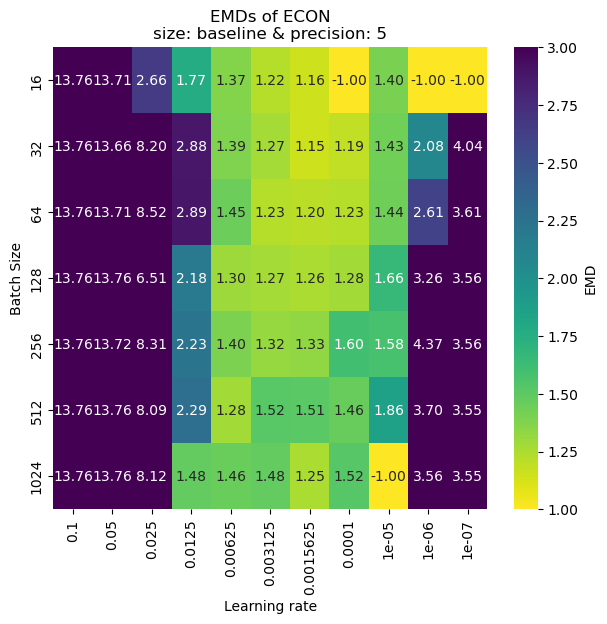

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


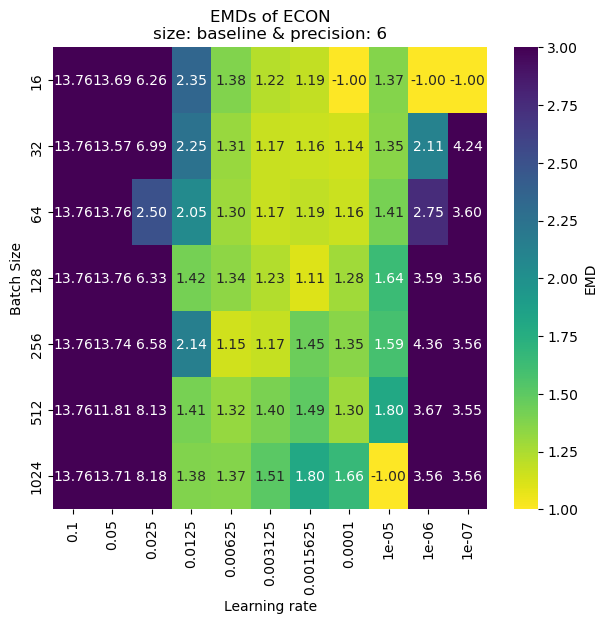

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


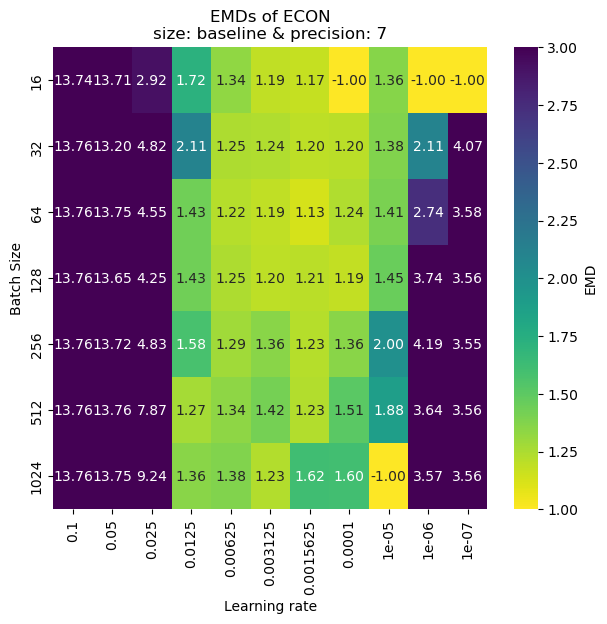

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


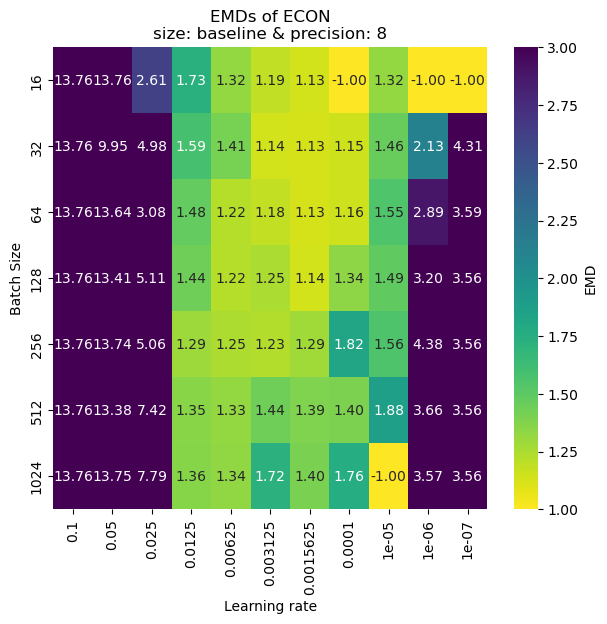

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


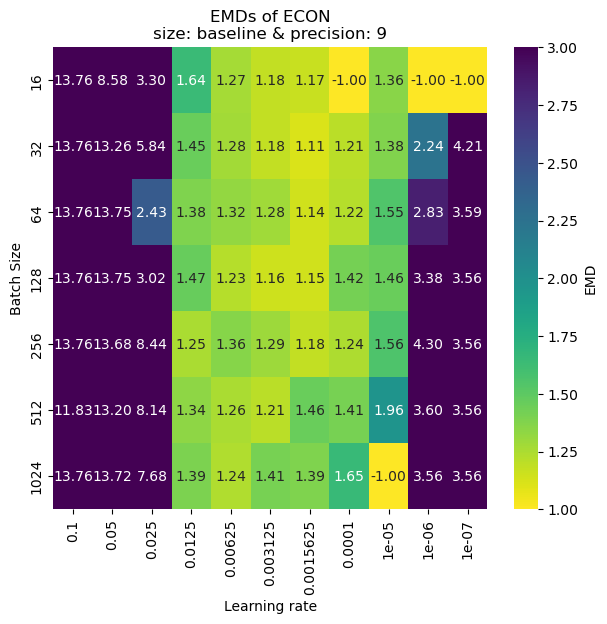

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


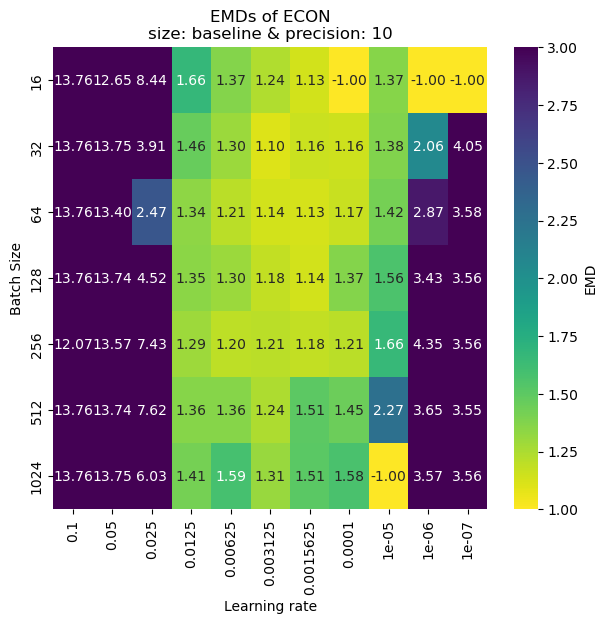

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


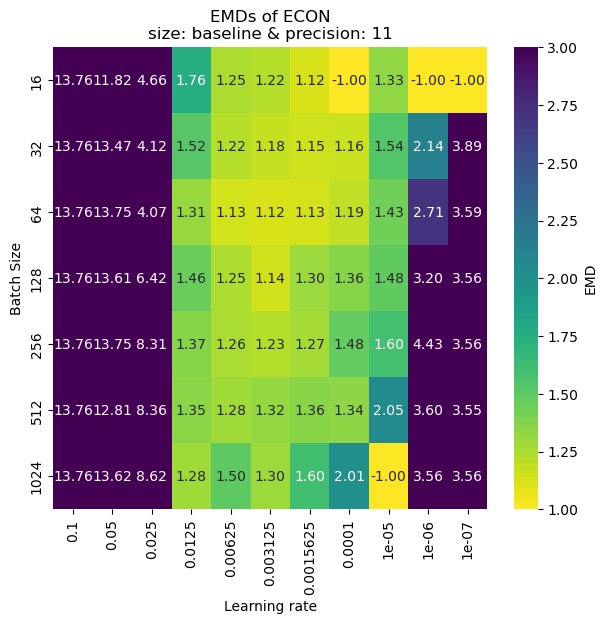

In [399]:
# plotting a heat map per layer
for p in precisions:
    EMD_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            mean_EMD= get_emd(DATA_PATH, bs, lr, p, size)
            EMD_matrix[x, y] = mean_EMD
            
            
    EMD_matrix = pd.DataFrame(EMD_matrix, 
                              index=batch_sizes, 
                              columns=learning_rates)
    
    plot_2d_heatmap(EMD_matrix, 
                    f'EMDs of ECON\nsize: {size} & precision: {p}', 
                    (1, 3),
                    'Learning rate',
                    'Batch Size',
                    'EMD',
                    cmap='viridis_r')

Let's remove high learning rates from next analysis:

In [400]:
emd_distribution = []
for p in precisions:
    EMD_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            mean_EMD = get_emd(DATA_PATH, bs, lr, p, size)
            EMD_matrix[x, y] = mean_EMD
            emd_distribution.append({
                'precision': p, 
                'EMD': mean_EMD,
                'batch_size': str(bs),
                'learning_rate': str(lr),
            })

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py

In [401]:
emd_distribution_df = pd.DataFrame(emd_distribution)
emd_distribution_df = emd_distribution_df.sort_values(by='EMD', ascending=True)

## Scientific Benchmark

In [402]:
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
noise_type = 'gaussian'

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py

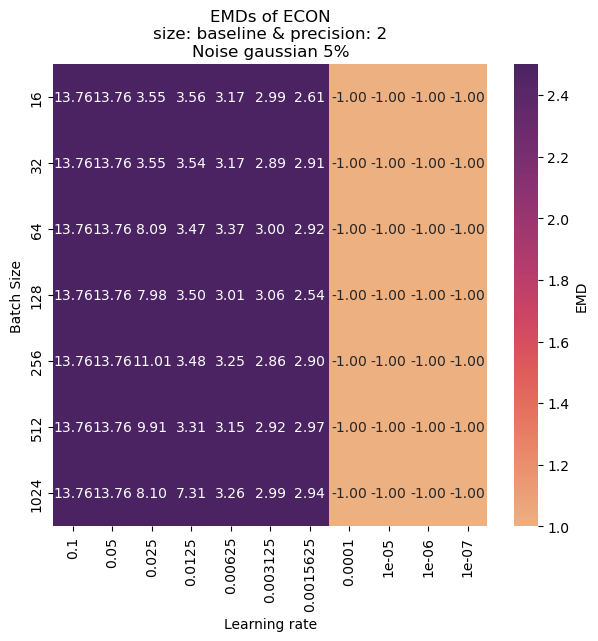

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


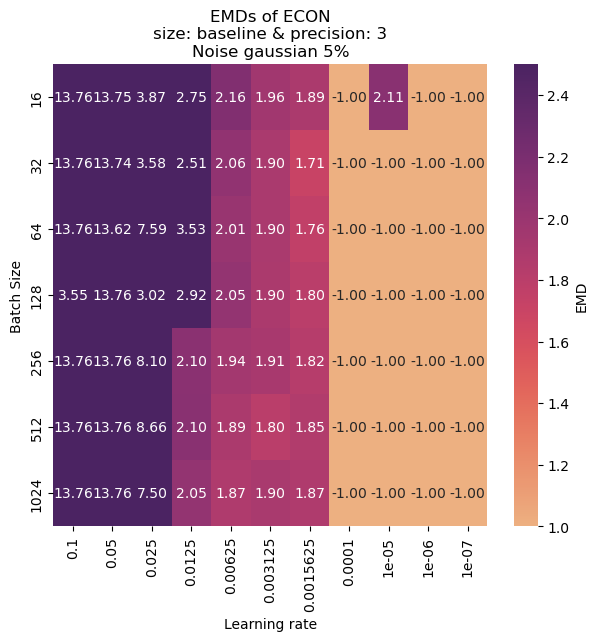

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


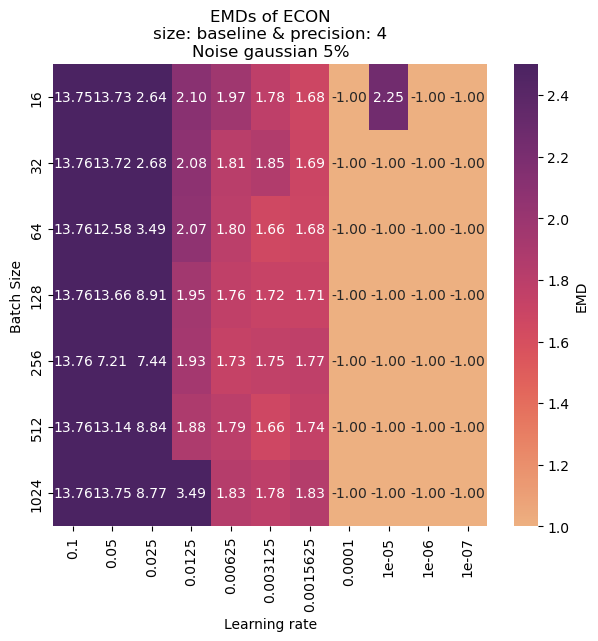

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


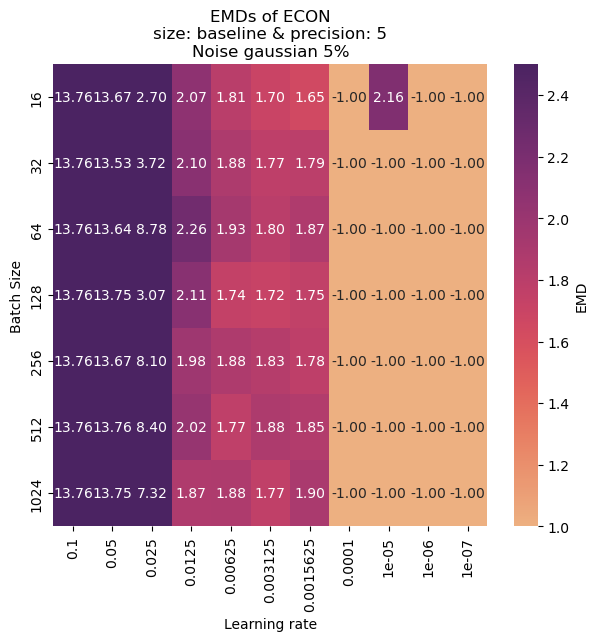

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_6b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


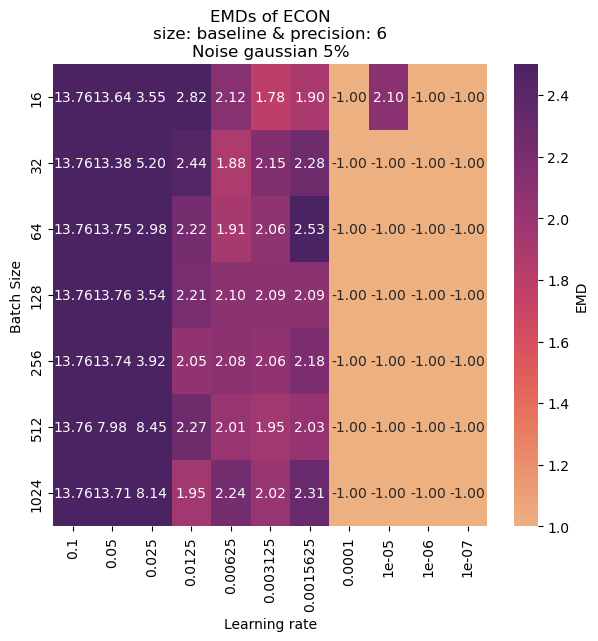

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_7b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


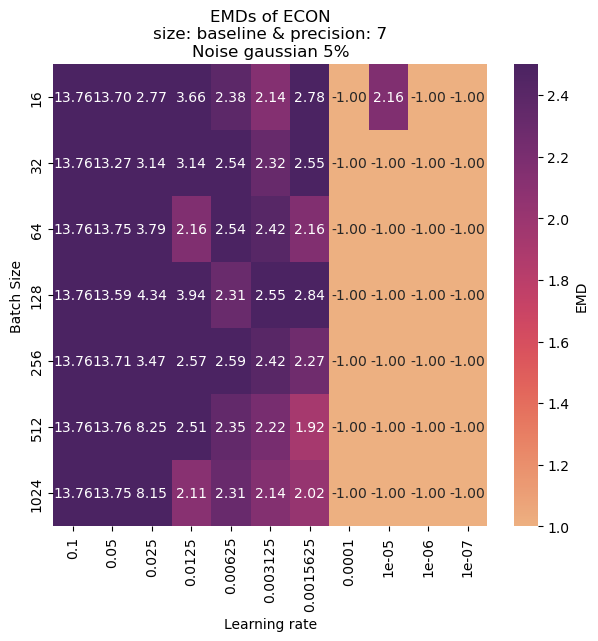

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_8b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


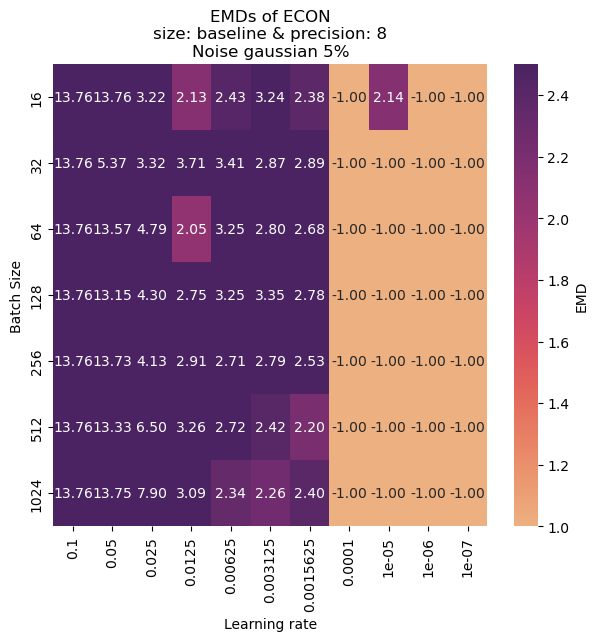

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_9b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


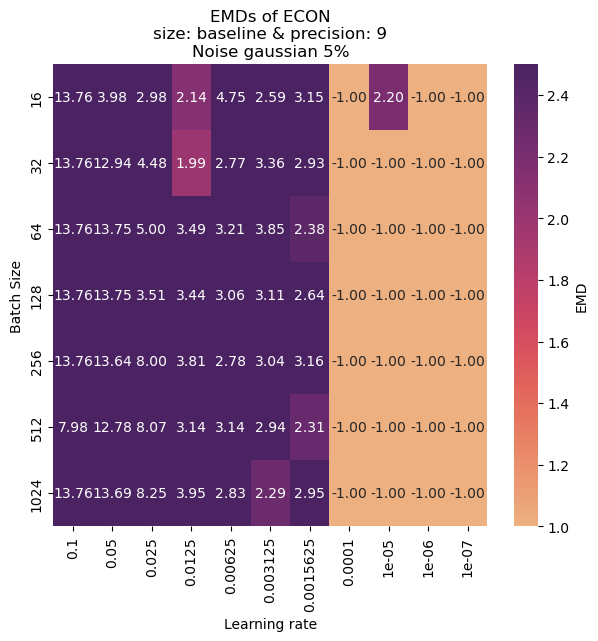

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_10b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


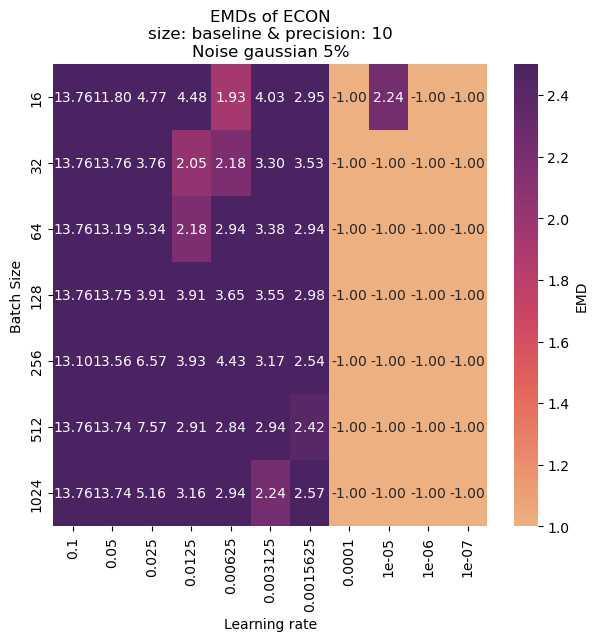

/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs1024_lr1e-05/ECON_11b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")


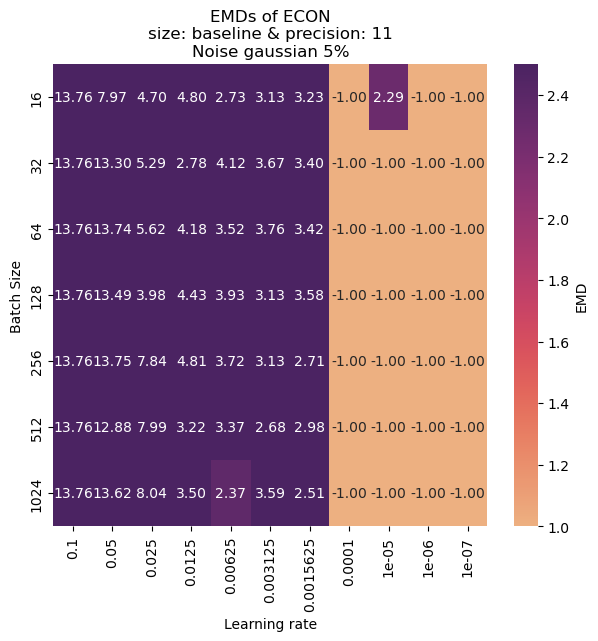

In [403]:
emd_distribution = []
for p in precisions:
    EMD_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            # get teh noise values
            noise_emd_5 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 5)
            noise_emd_10 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 10)
            noise_emd_15 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 15)
            noise_emd_20 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 20)
            original_emd = get_emd(DATA_PATH, bs, lr, p, size)
            
            # build the matrix for the heatmap
            EMD_matrix[x, y] = noise_emd_5
            
            # store the values for the plots
            emd_distribution.append({
                'precision': p, 
                'emd': original_emd,
                # 'noise 5%': (noise_emd_5 - original_emd) * 100 / original_emd,
                # 'noise 10%': (noise_emd_10 - original_emd) * 100 / original_emd,
                # 'noise 15%': (noise_emd_15 - original_emd) * 100 / original_emd,
                # 'noise 20%': (noise_emd_20 - original_emd) * 100 / original_emd,
                'noise 5%': noise_emd_5,
                'noise 10%': noise_emd_10,
                'noise 15%': noise_emd_15,
                'noise 20%': noise_emd_20,
                'batch_size': str(bs),
                'learning_rate': str(lr),
                'precision': p,
            })
            
    # heat map of the EMD with noise as input per precision
    EMD_matrix = pd.DataFrame(EMD_matrix, 
                              index=batch_sizes, 
                              columns=learning_rates)
    
    plot_2d_heatmap(EMD_matrix, 
                    f'EMDs of ECON\nsize: {size} & precision: {p}\n' \
                    f'Noise {noise_type} 5%', 
                    (1, 2.5),
                    'Learning rate',
                    'Batch Size',
                    'EMD',
                    cmap='flare')
        

In [404]:
emd_distribution_df = pd.DataFrame(emd_distribution)
# export the CSV
emd_distribution_df.to_csv("./results/econ/noise.csv", index=False)

We want to plot the heatmap based on the precision, because the batch size is not correlated with the EMD and the noise.

--------------------------------------------------------------------------------


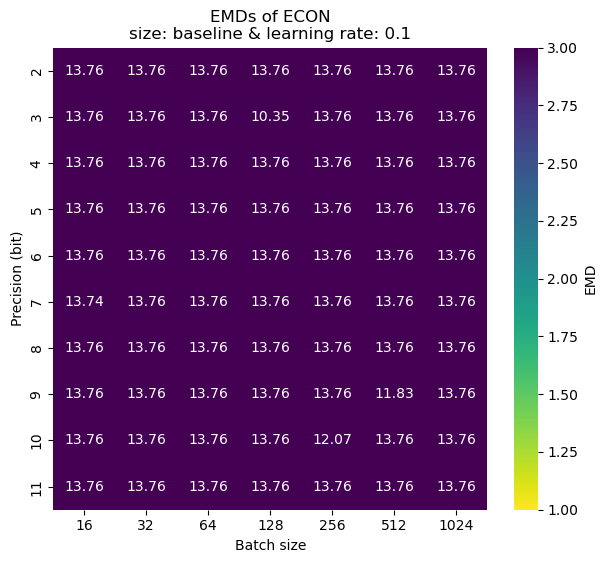

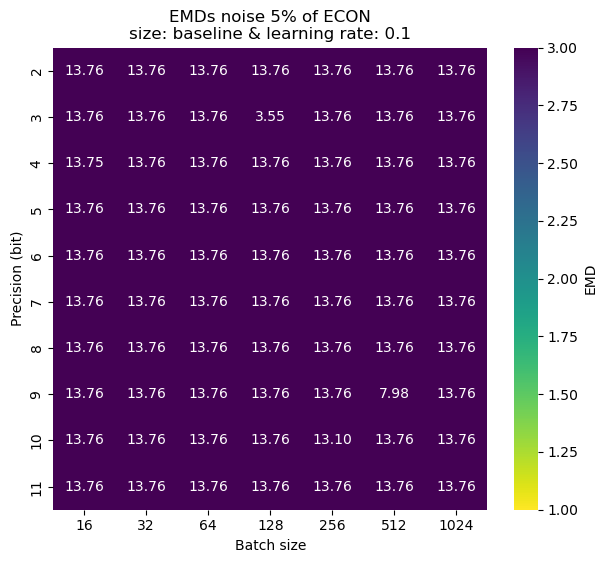

--------------------------------------------------------------------------------


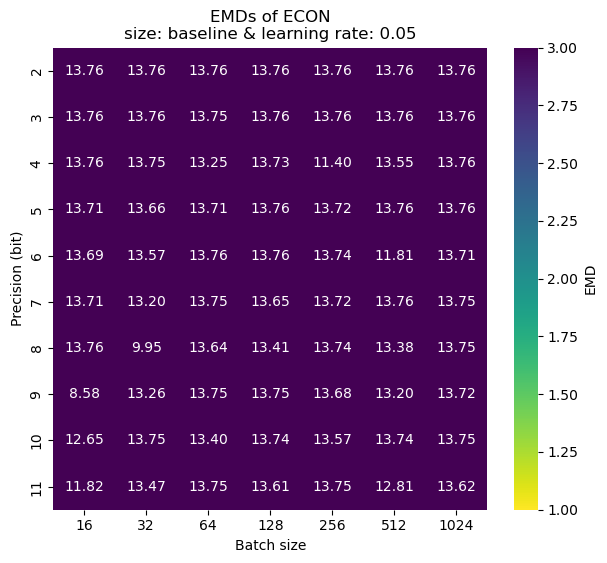

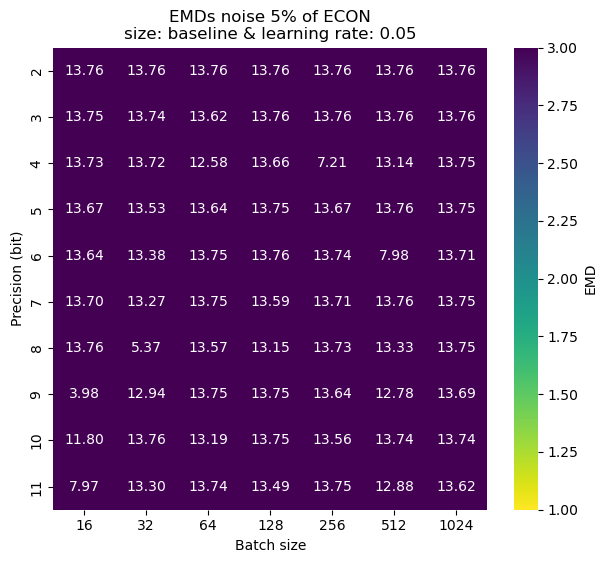

--------------------------------------------------------------------------------


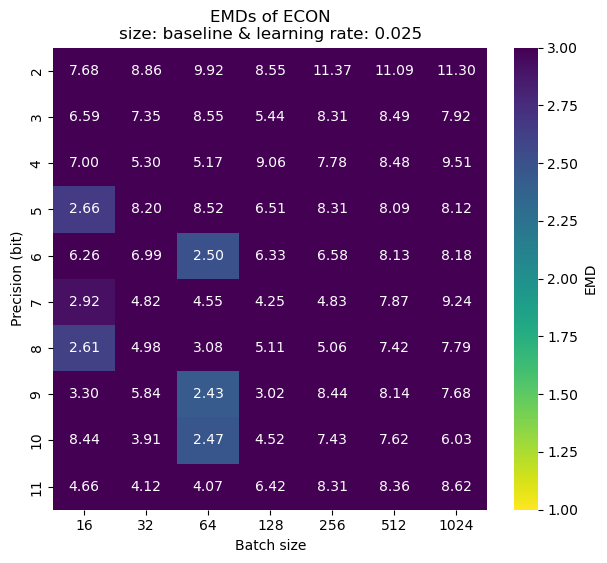

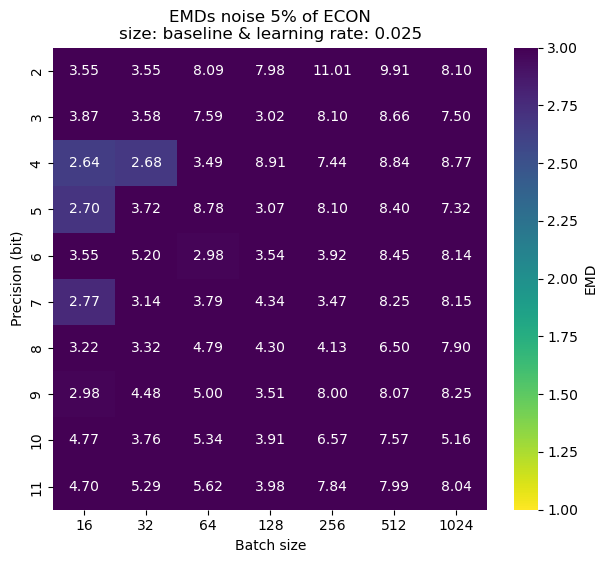

--------------------------------------------------------------------------------


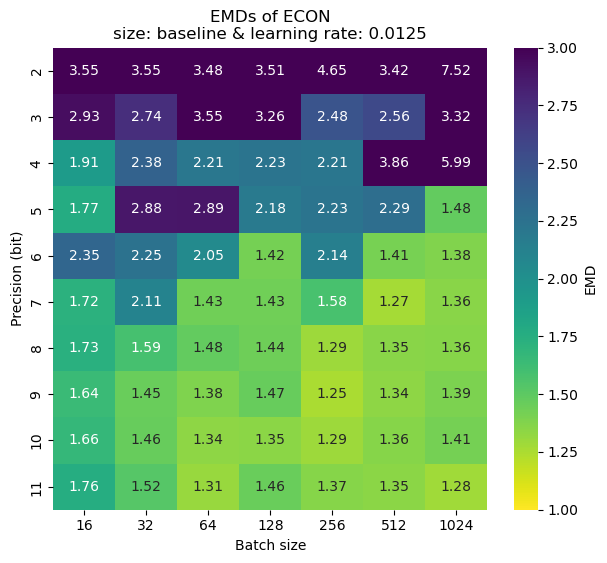

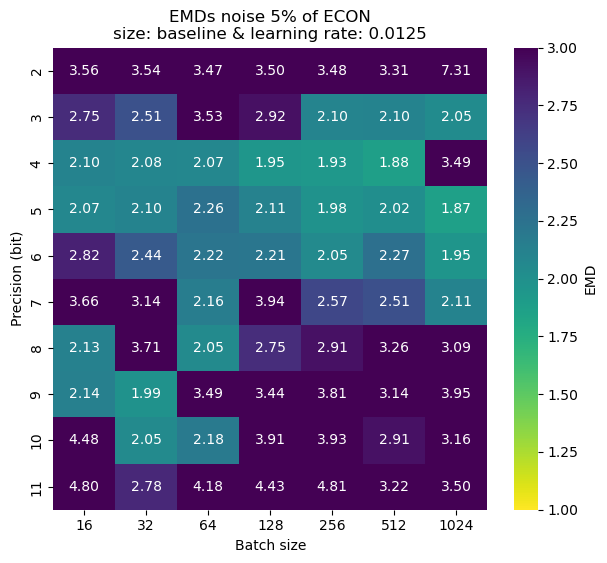

--------------------------------------------------------------------------------


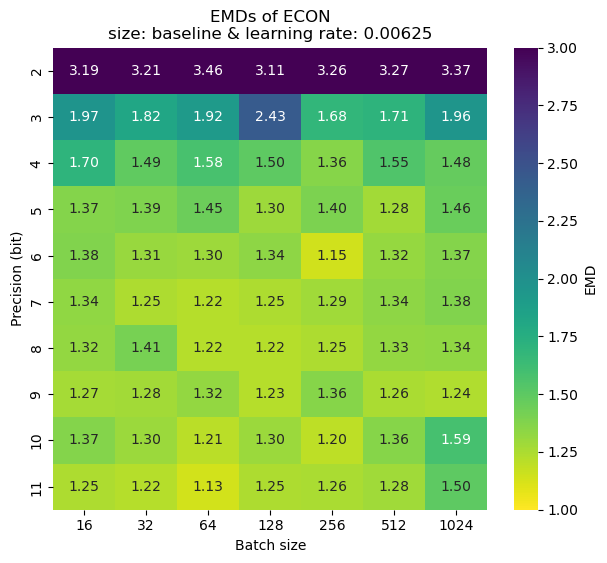

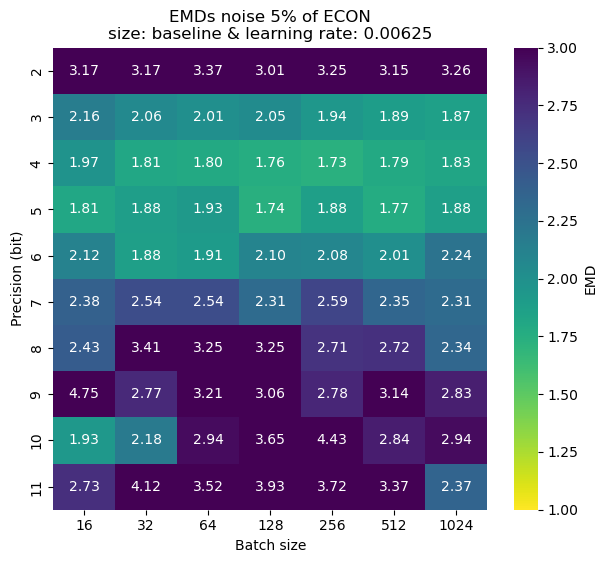

--------------------------------------------------------------------------------


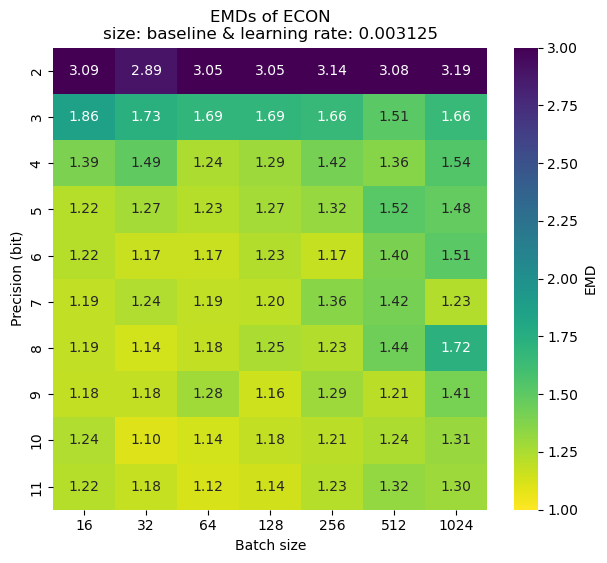

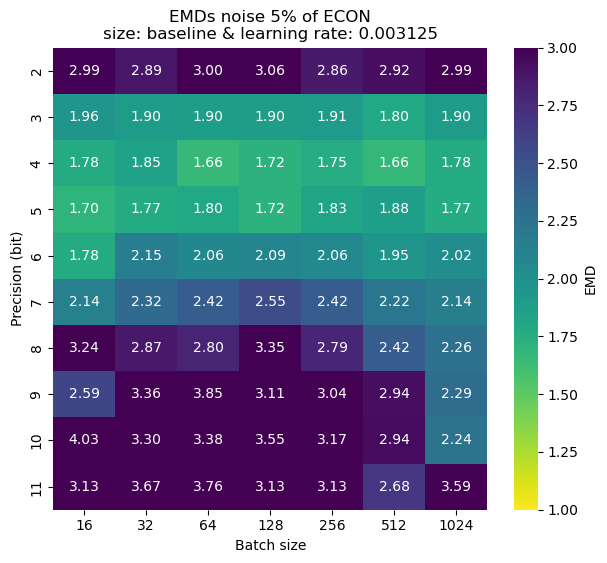

--------------------------------------------------------------------------------


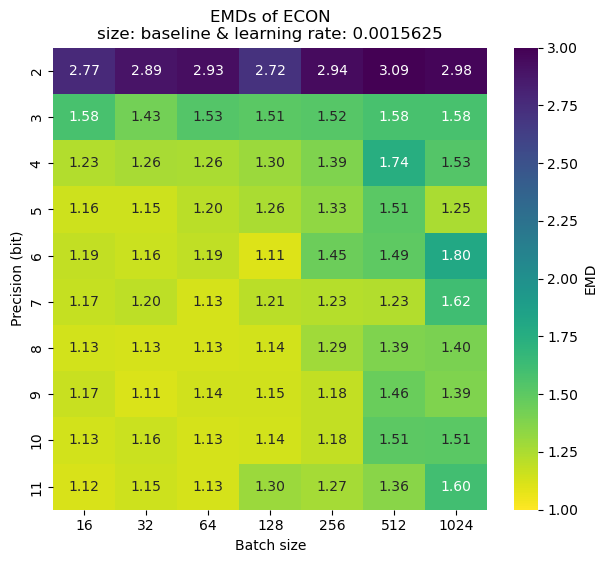

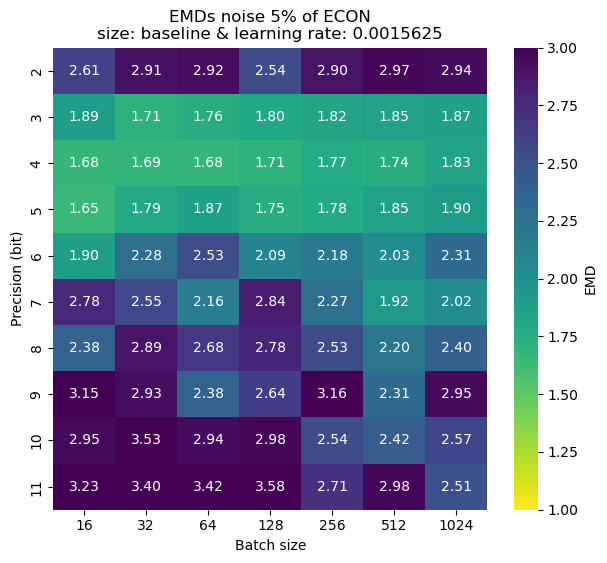

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520

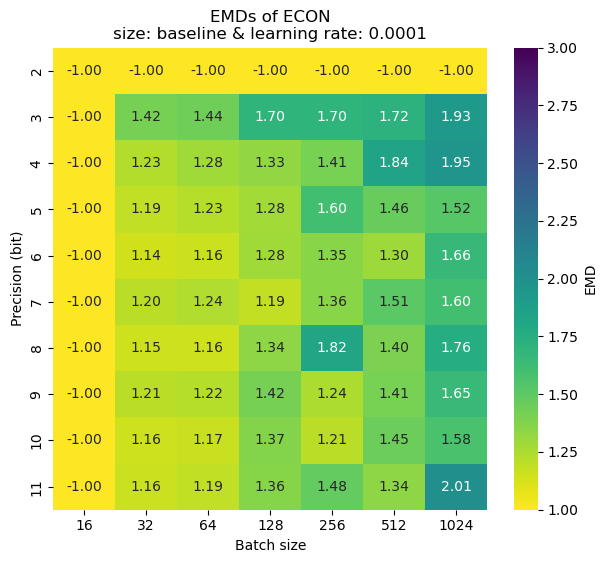

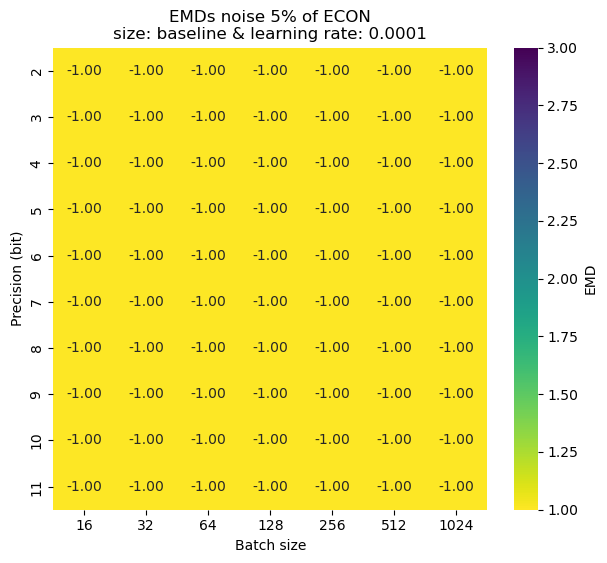

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs32_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs64_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs128_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py

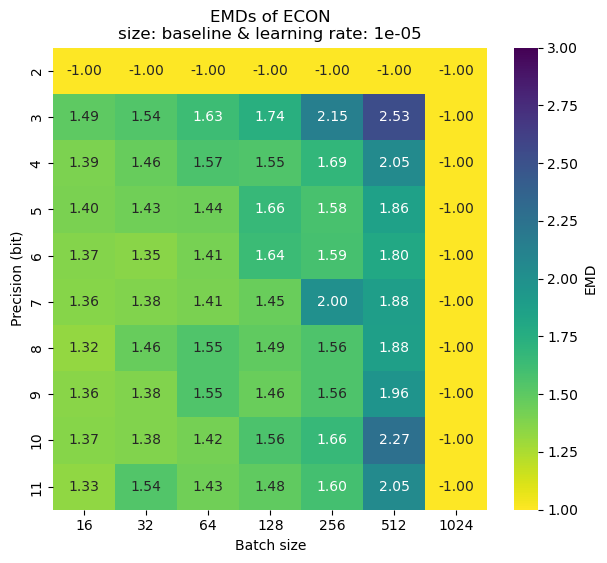

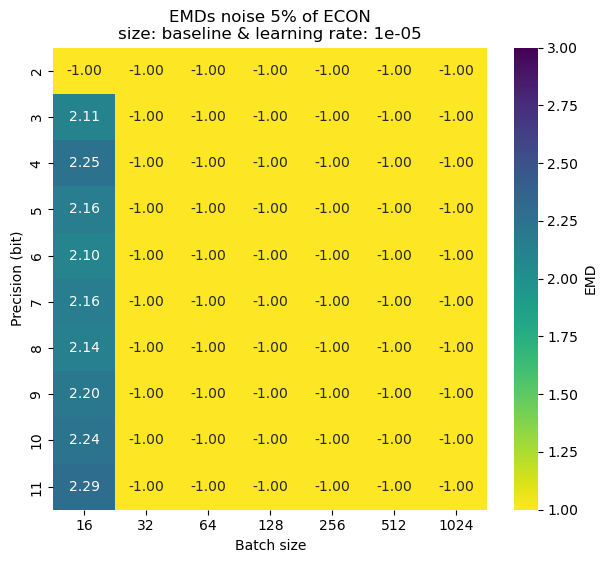

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:

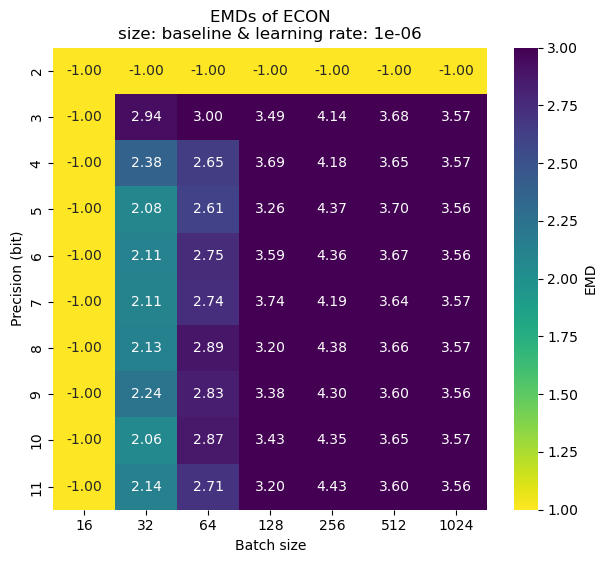

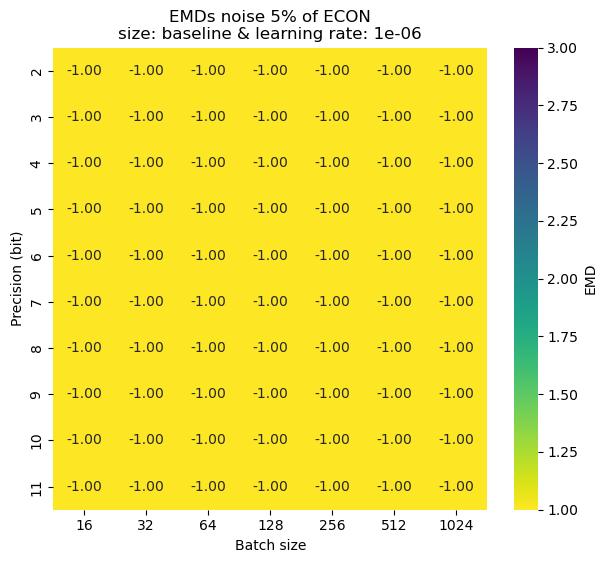

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:

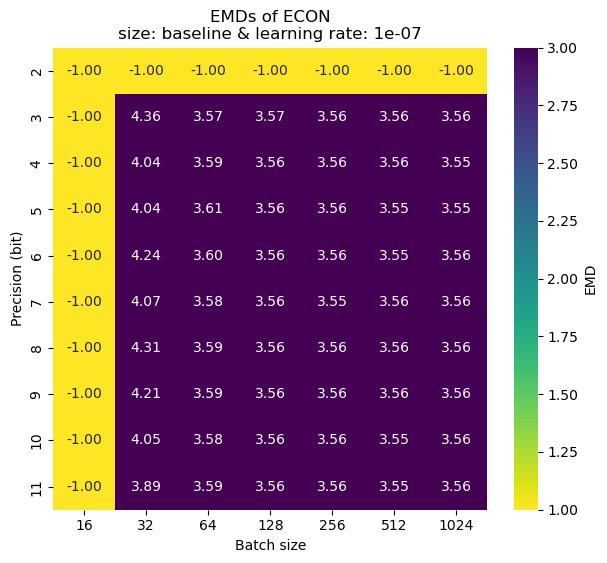

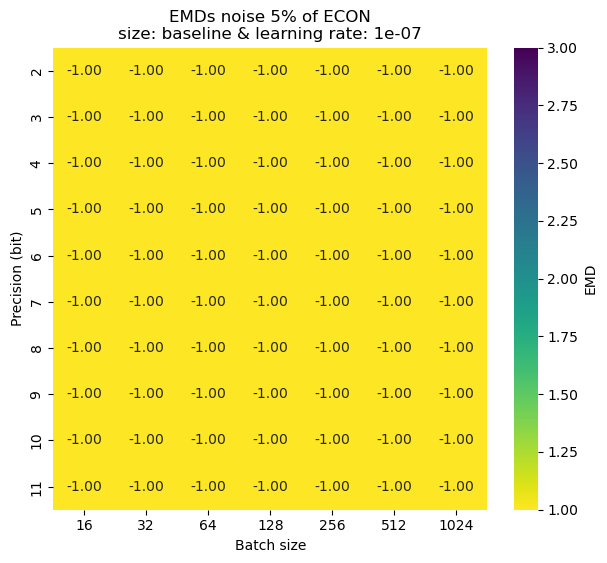

In [405]:

for lr in learning_rates:
    matrix = np.zeros((len(precisions), len(batch_sizes)))
    noise_matrix = np.zeros((len(precisions), len(batch_sizes)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            mean_emd = get_emd(DATA_PATH, bs, lr, p, size)
            noise_emd_5 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 5)
            
            # build the heatmap matrix
            matrix[x, y] = mean_emd
            noise_matrix[x, y] = noise_emd_5

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'EMDs of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    
    plot_2d_heatmap(noise_matrix, 
                    f'EMDs noise 5% of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    

--------------------------------------------------------------------------------


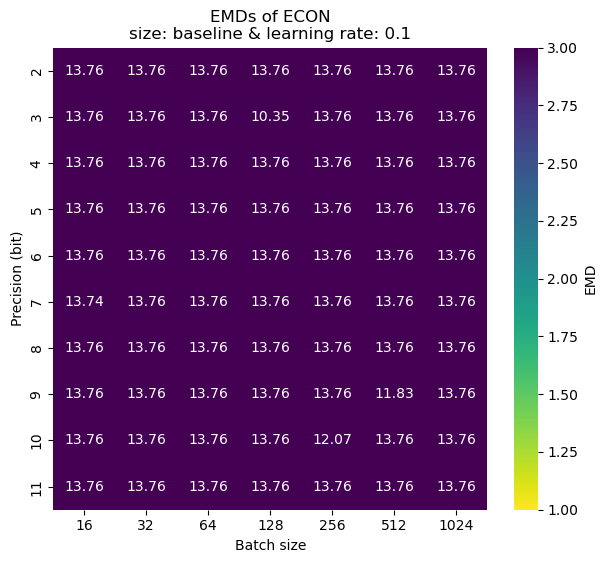

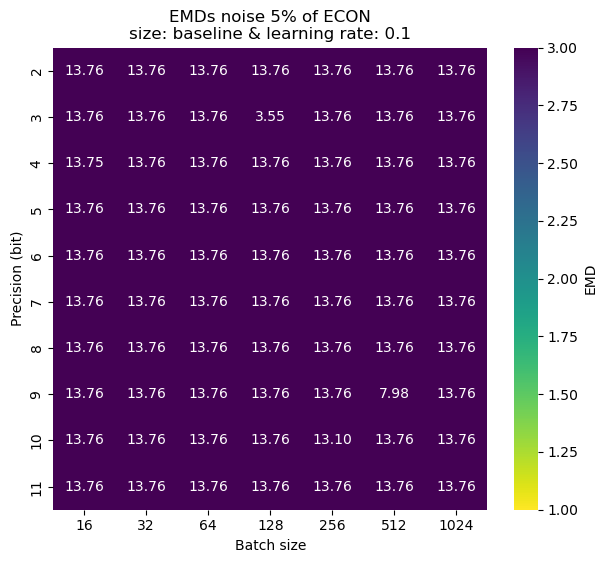

--------------------------------------------------------------------------------


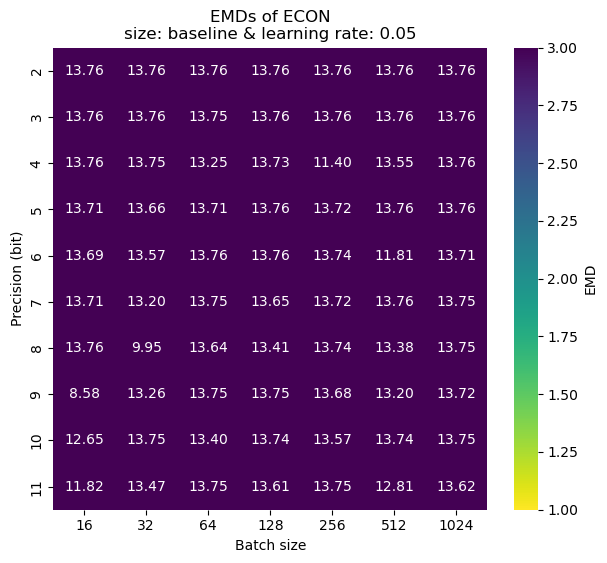

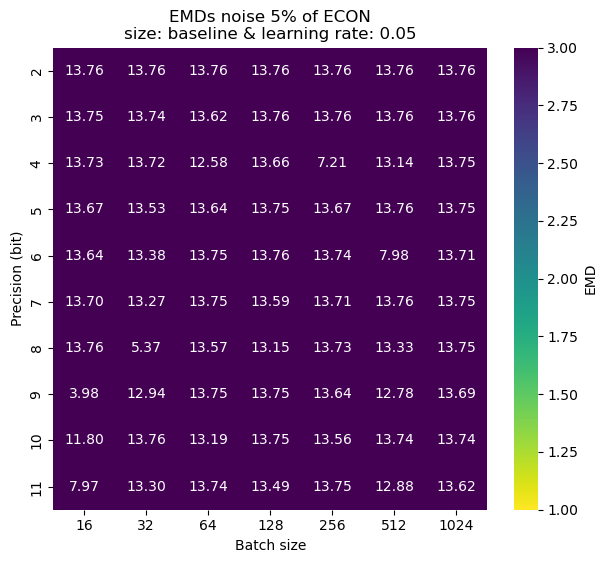

--------------------------------------------------------------------------------


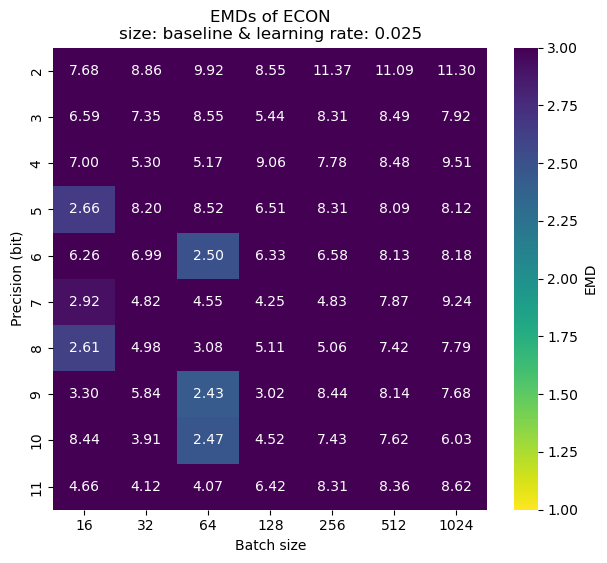

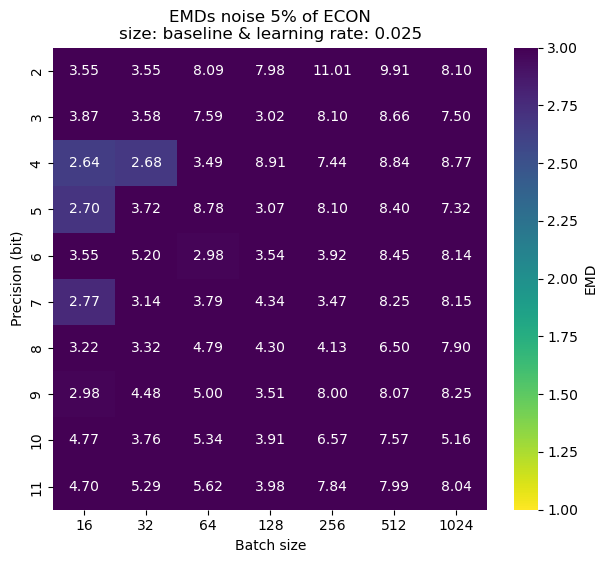

--------------------------------------------------------------------------------


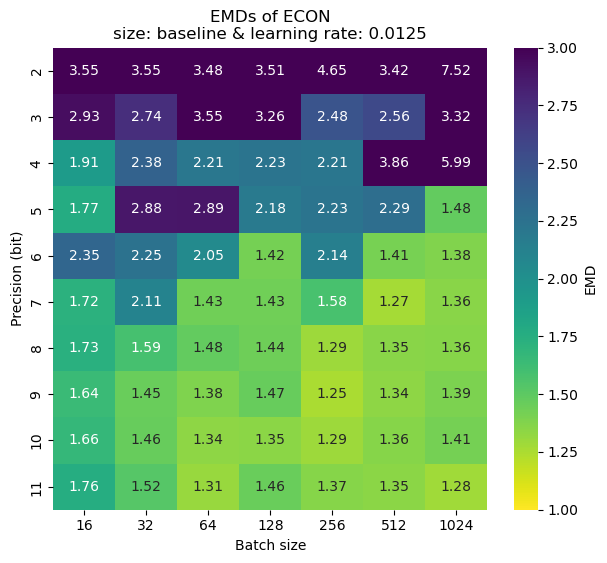

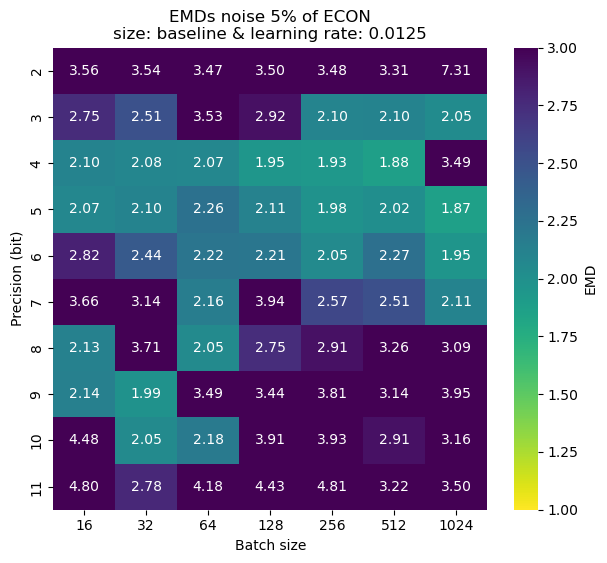

--------------------------------------------------------------------------------


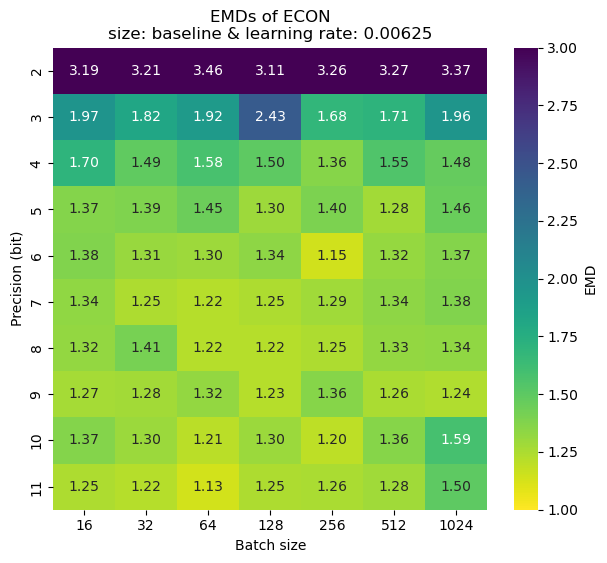

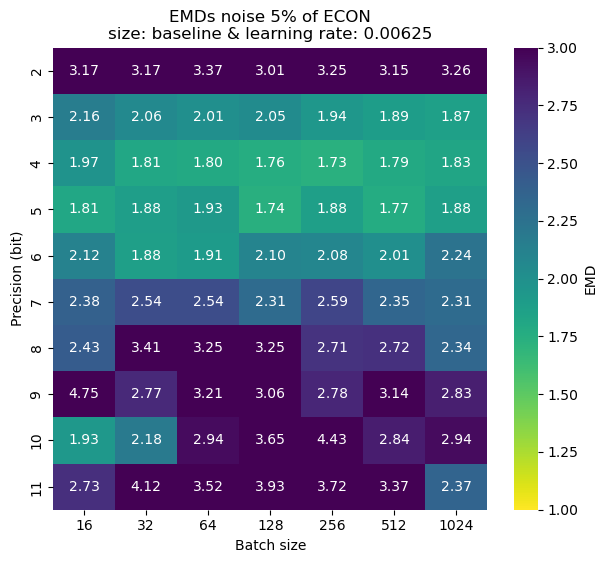

--------------------------------------------------------------------------------


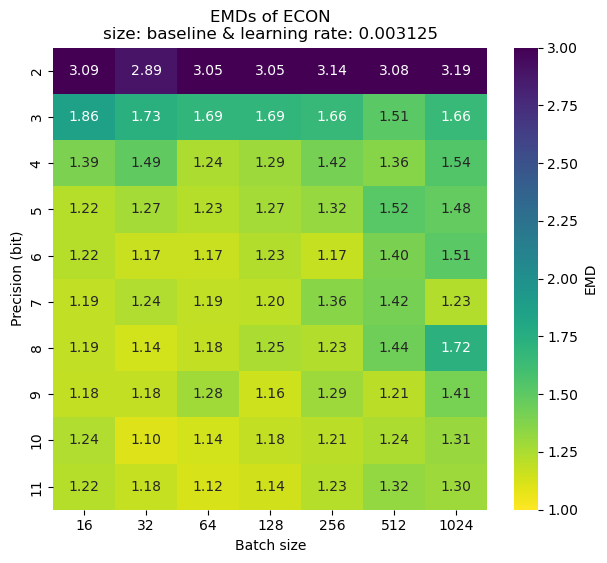

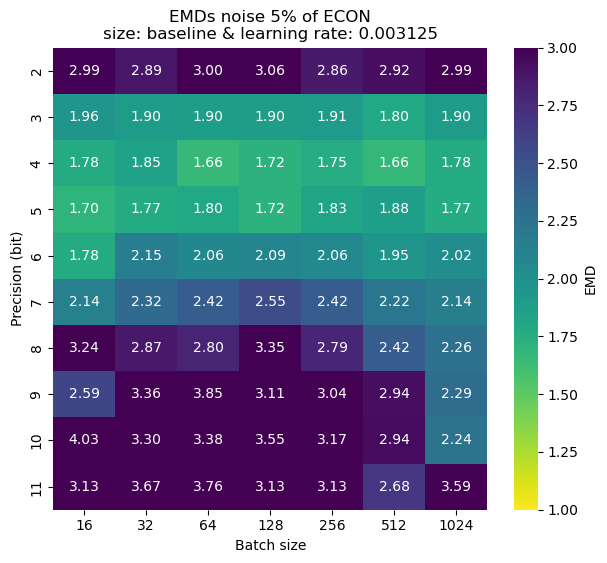

--------------------------------------------------------------------------------


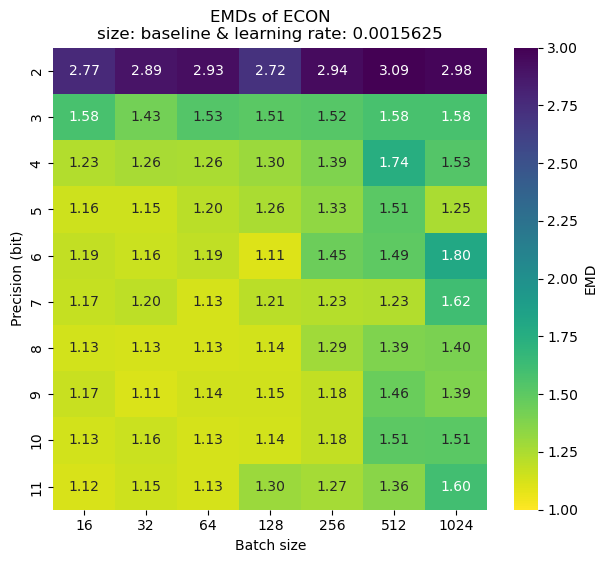

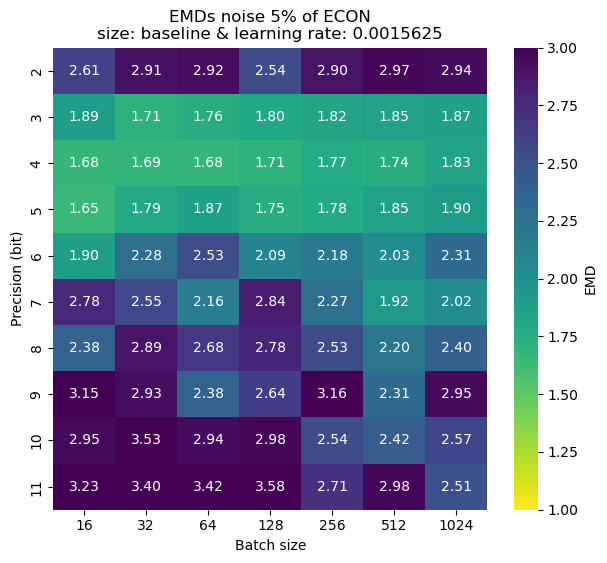

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0001/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520

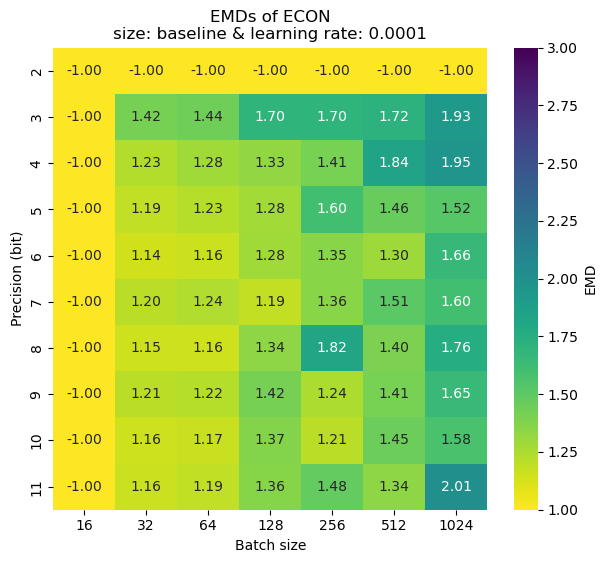

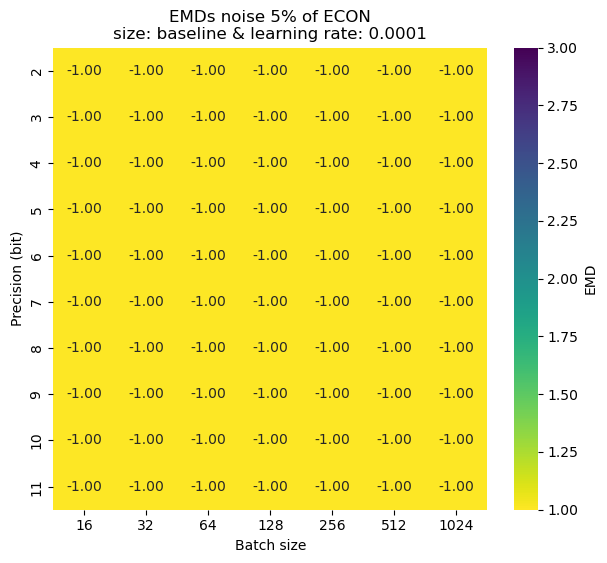

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs32_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs64_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs128_lr1e-05/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py

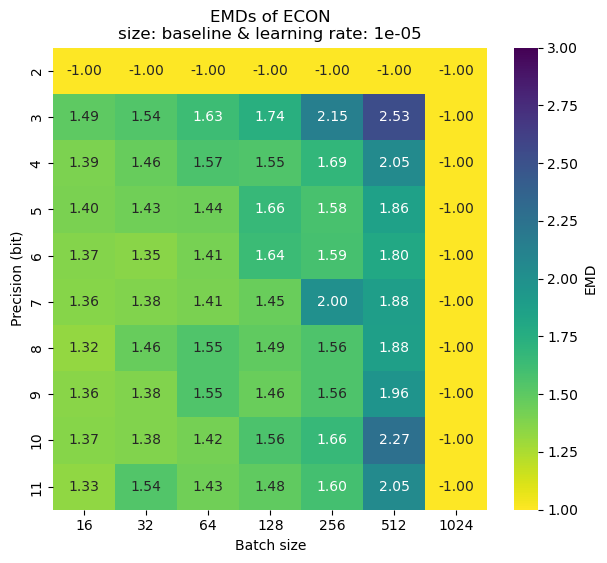

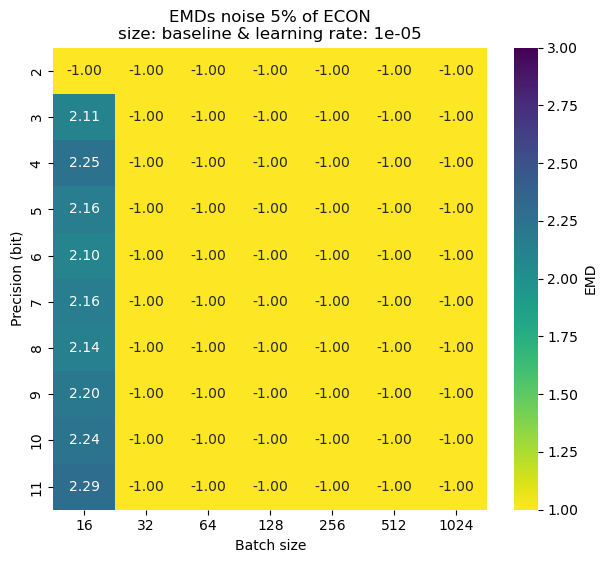

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-06/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:

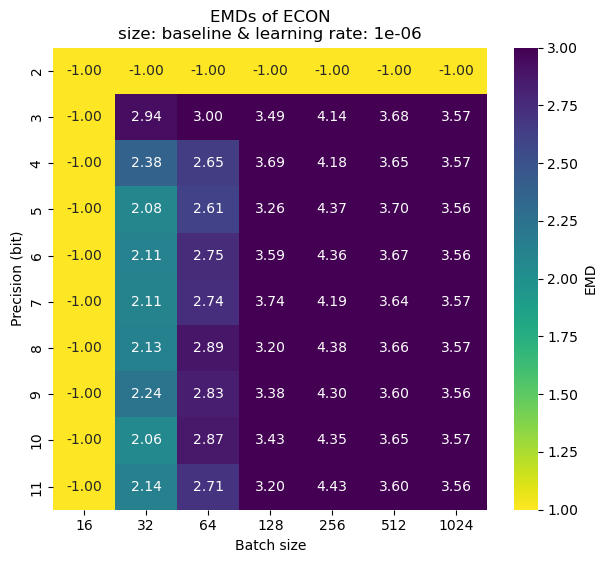

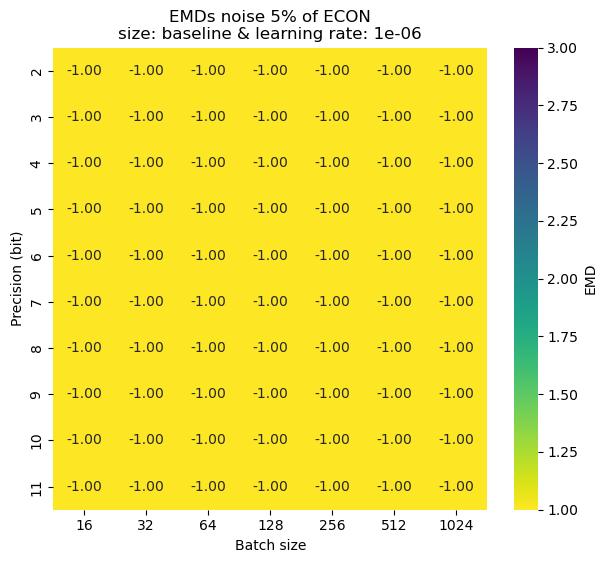

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:23: UserWarning: No EMD values found for the model: bs16_lr1e-07/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/3666458520.py:

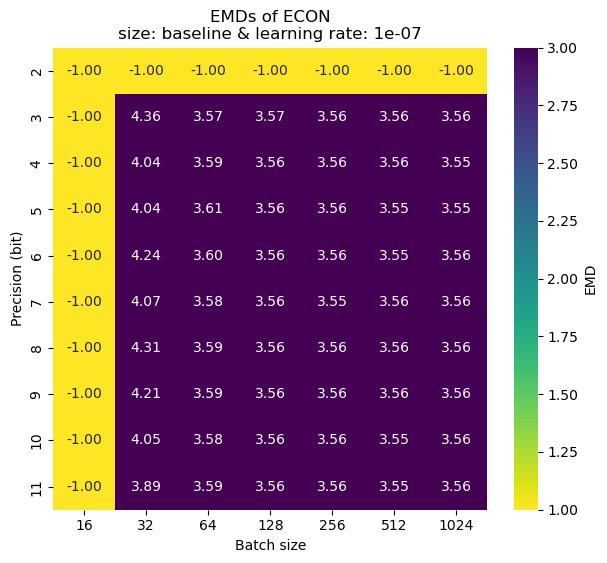

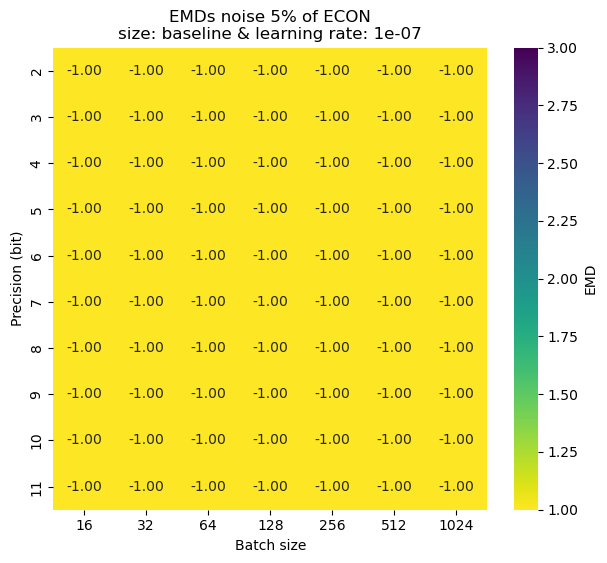

In [406]:

for lr in learning_rates:
    matrix = np.zeros((len(precisions), len(batch_sizes)))
    noise_matrix = np.zeros((len(precisions), len(batch_sizes)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            mean_emd = get_emd(DATA_PATH, bs, lr, p, size)
            noise_emd_5 = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, 5)
            
            # build the heatmap matrix
            matrix[x, y] = mean_emd
            noise_matrix[x, y] = noise_emd_5

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'EMDs of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    
    plot_2d_heatmap(noise_matrix, 
                    f'EMDs noise 5% of ECON\nsize: {size} & learning rate: {lr}', 
                    (1, 3),
                    'Batch size',
                    'Precision (bit)',
                    'EMD',
                    cmap='viridis_r')
    

## ECON with Noise Injection in the training

In [407]:
def get_emd(path, batch_size, learning_rate, precision, size, percentage=0.3, num_tests=3):
    EMDs = []
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    for i in range(1, num_tests + 1):
        file_path = os.path.join(
            path, 
            f'bs{batch_size}_lr{lr}/ECON_AUG_{precision}b/{size}/{size}_emd_{i}_{percentage}.txt'
        )
        print(file_path)
        try:
            with open(file_path) as emd_file:
                emd_text = emd_file.read()
                emd_data = ast.literal_eval(emd_text)
                emd = emd_data[0]['AVG_EMD']
                EMDs.append(emd)
        except FileNotFoundError:
            continue
        except Exception as e:
            warnings.warn(f"An error occurred while processing {file_path}: {e}")
            continue
    
    if not EMDs:
        warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
        return -1
    
    return mean(EMDs)


def get_emd_with_noise(path, batch_size, learning_rate, precision, size, noise_type, percentage, aug_percentage=0.3):
    '''
    Return the EMD achieved by the Model with a certain level of noise
    '''
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    file_path = os.path.join(
                path,
                f'bs{batch_size}_lr{lr}/' \
                f'ECON_AUG_{precision}b/{size}/emd_aug_{aug_percentage}_{noise_type}_{percentage}.txt'
        ) 
    noise_emd = -1
    try:
        emd_file = open(file_path)
        emd_text = emd_file.read()
        if not emd_text.startswith('['):
            noise_emd = float(emd_text)
        else:
            emd = ast.literal_eval(emd_text)
            noise_emd = emd[0]['AVG_EMD']
        emd_file.close()
    except Exception as e:
        # warnings.warn("Warning: " + file_path + " not found!")
        return -1
    return noise_emd

In [408]:
noise_type = 'gaussian'
percentage = 5
learning_rates = [0.0015625]
aug_percentages = [0.3, 0.5]

/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_2b/baseline/baseline_emd_1_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_2b/baseline/baseline_emd_2_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_2b/baseline/baseline_emd_3_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_3b/baseline/baseline_emd_1_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_3b/baseline/baseline_emd_2_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_3b/baseline/baseline_emd_3_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_4b/baseline/baseline_emd_1_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_4b/baseline/baseline_emd_2_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_4b/baseline/baseline_emd_3_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_5b/baseline/baseline_emd_1_0.3.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_5b/baseline/baseline_emd_2_0.3.txt
/data/tbal

/tmp/tbaldi/ipykernel_1684258/2524658374.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0015625/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/2524658374.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0015625/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/2524658374.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0015625/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/2524658374.py:23: UserWarning: No EMD values found for the model: bs16_lr0.0015625/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_168425

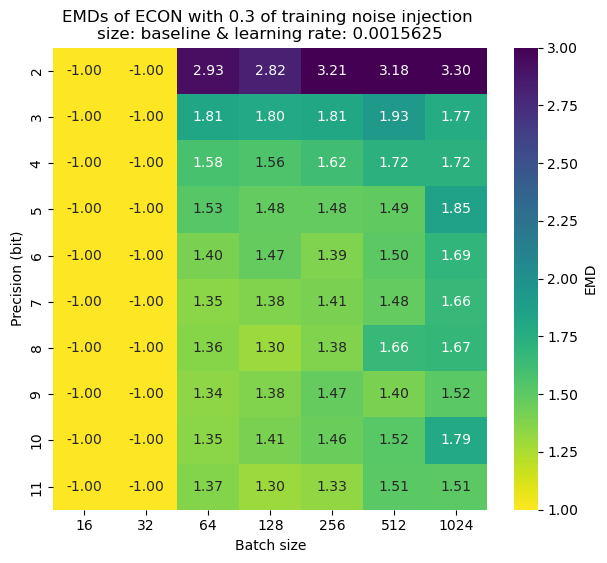

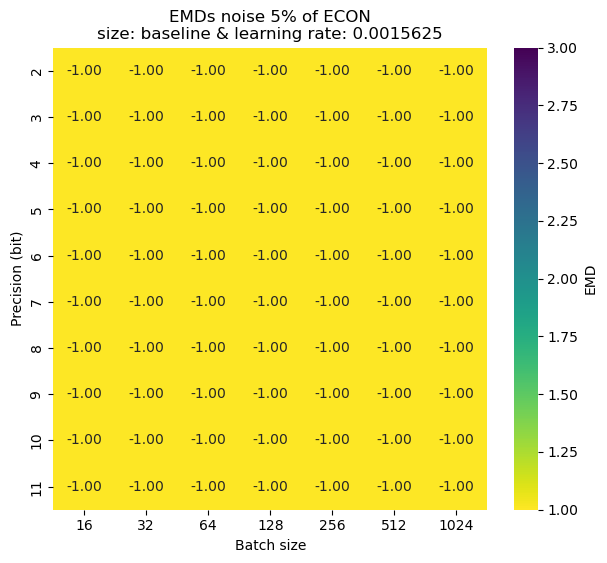

/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_2b/baseline/baseline_emd_1_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_2b/baseline/baseline_emd_2_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_2b/baseline/baseline_emd_3_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_3b/baseline/baseline_emd_1_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_3b/baseline/baseline_emd_2_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_3b/baseline/baseline_emd_3_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_4b/baseline/baseline_emd_1_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_4b/baseline/baseline_emd_2_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_4b/baseline/baseline_emd_3_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_5b/baseline/baseline_emd_1_0.5.txt
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/ECON_AUG_5b/baseline/baseline_emd_2_0.5.txt
/data/tbal

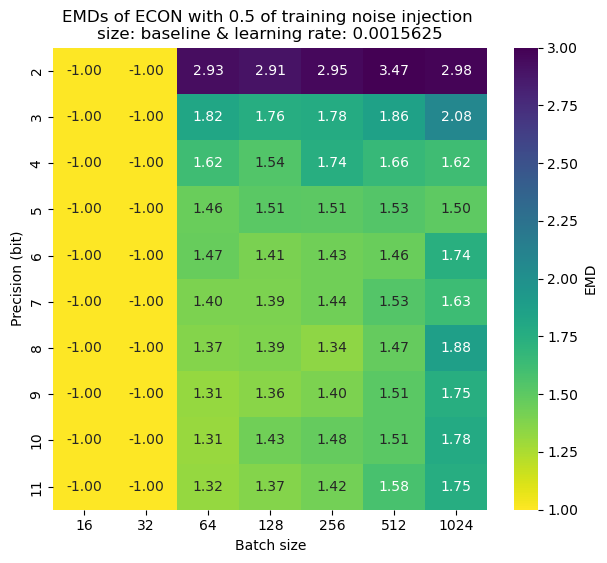

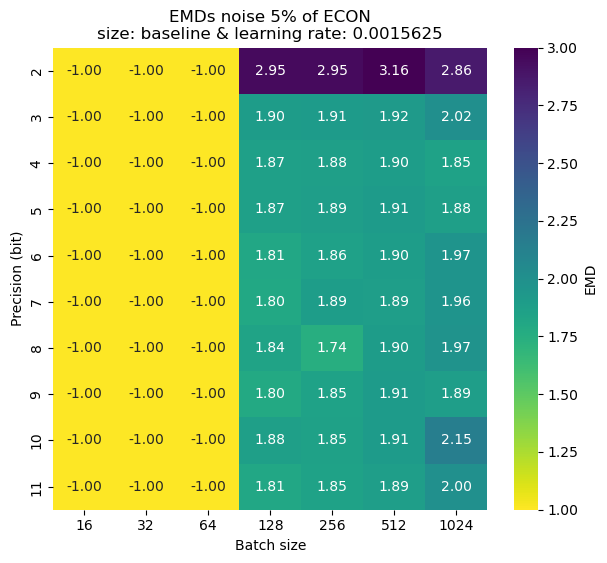

In [409]:
for aug_percentage in aug_percentages:
    for lr in learning_rates:
        matrix = np.zeros((len(precisions), len(batch_sizes)))
        noise_matrix = np.zeros((len(precisions), len(batch_sizes)))
        for y, bs in enumerate(batch_sizes):
            for x, p in enumerate(precisions):
                # get the performances with and without noise
                mean_emd = get_emd(DATA_PATH, bs, lr, p, size, percentage=aug_percentage)
                noisy_emd = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, percentage, aug_percentage)
                
                # build the heatmap matrix
                matrix[x, y] = mean_emd
                noise_matrix[x, y] = noisy_emd

                
        # plot the heatmaps per precision
        matrix = pd.DataFrame(matrix, 
                            index=precisions, 
                            columns=batch_sizes)
        noise_matrix = pd.DataFrame(noise_matrix, 
                              index=precisions, 
                              columns=batch_sizes)
        print(80*'-')
        plot_2d_heatmap(matrix, 
                        f'EMDs of ECON with {aug_percentage} of training noise injection \nsize: {size} & learning rate: {lr}', 
                        (1, 3),
                        'Batch size',
                        'Precision (bit)',
                        'EMD',
                        cmap='viridis_r')
        
        plot_2d_heatmap(noise_matrix, 
                        f'EMDs noise 5% of ECON\nsize: {size} & learning rate: {lr}', 
                        (1, 3),
                        'Batch size',
                        'Precision (bit)',
                        'EMD',
                        cmap='viridis_r')
        

## ECON with Jacobian regularization

In [410]:

def get_emd(path, batch_size, learning_rate, precision, size, percentage=0.3, num_tests=3):
    EMDs = []
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    for i in range(1, num_tests + 1):
        file_path = os.path.join(
            path, 
            f'bs{batch_size}_lr{lr}/ECON_JREG_{precision}b/{size}/{size}_emd_{i}_{percentage}.txt'
        )
        try:
            with open(file_path) as emd_file:
                emd_text = emd_file.read()
                emd_data = ast.literal_eval(emd_text)
                emd = emd_data[0]['AVG_EMD']
                EMDs.append(emd)
        except FileNotFoundError:
            continue
        except Exception as e:
            warnings.warn(f"An error occurred while processing {file_path}: {e}")
            continue
    
    if not EMDs:
        warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
        return -1
    
    return mean(EMDs)



def get_emd_with_noise(path, batch_size, learning_rate, precision, size, noise_type, percentage, jreg=0.1):
    '''
    Return the EMD achieved by the Model with a certain level of noise
    '''
    lr = "{:.10f}".format(float(learning_rate)).rstrip('0')
    file_path = os.path.join(
                path,
                f'bs{batch_size}_lr{lr}/' \
                f'ECON_JREG_{precision}b/{size}/emd_jreg_{jreg}_{noise_type}_{percentage}.txt'
        ) 
    noise_emd = -1
    try:
        emd_file = open(file_path)
        emd_text = emd_file.read()
        if not emd_text.startswith('['):
            noise_emd = float(emd_text)
        else:
            emd = ast.literal_eval(emd_text)
            noise_emd = emd[0]['AVG_EMD']
        emd_file.close()
    except Exception as e:
        # warnings.warn("Warning: " + file_path + " not found!")
        return -1
    return noise_emd

In [411]:
noise_type = 'gaussian'
percentage = 5
learning_rates = [0.0015625]
jreg_percentages = [0.1, 0.01, 0.001]

--------------------------------------------------------------------------------


/tmp/tbaldi/ipykernel_1684258/474803169.py:22: UserWarning: No EMD values found for the model: bs16_lr0.0015625/ECON_2b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/474803169.py:22: UserWarning: No EMD values found for the model: bs16_lr0.0015625/ECON_3b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/474803169.py:22: UserWarning: No EMD values found for the model: bs16_lr0.0015625/ECON_4b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/474803169.py:22: UserWarning: No EMD values found for the model: bs16_lr0.0015625/ECON_5b/baseline
  warnings.warn(f"No EMD values found for the model: bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}")
/tmp/tbaldi/ipykernel_1684258/47

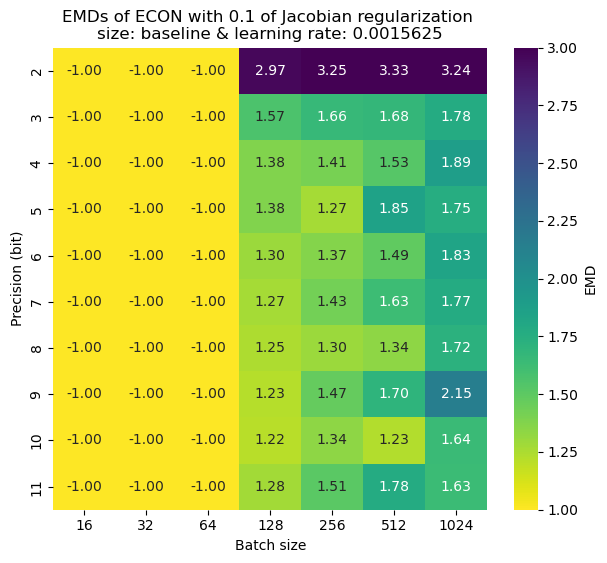

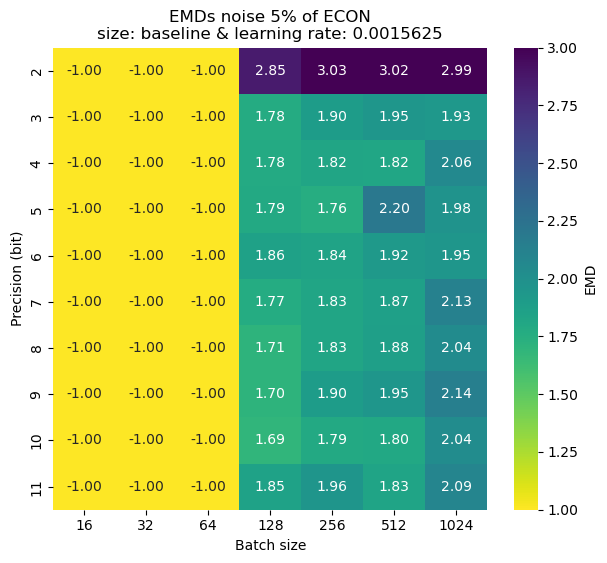

--------------------------------------------------------------------------------


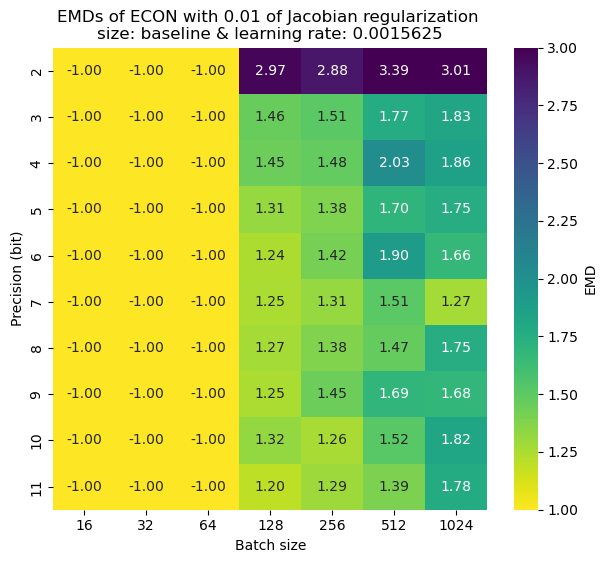

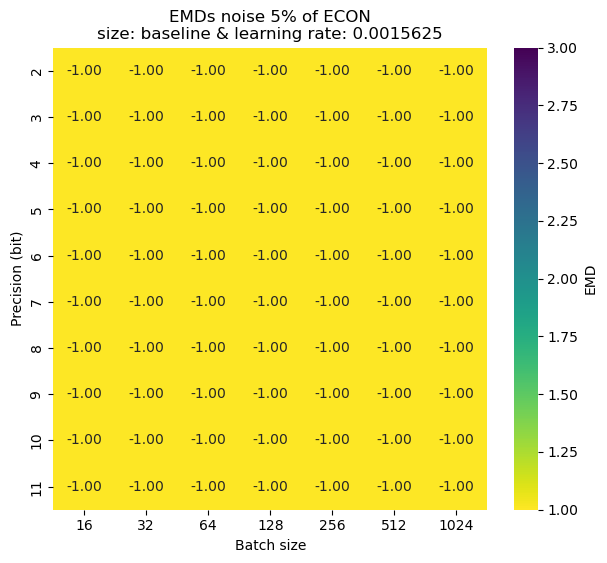

--------------------------------------------------------------------------------


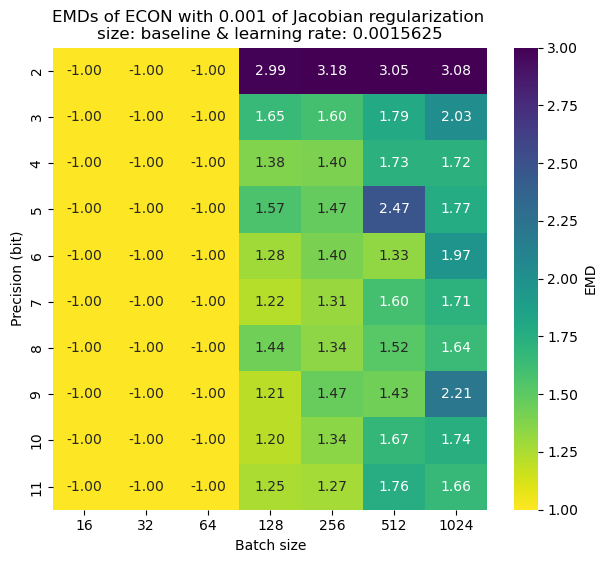

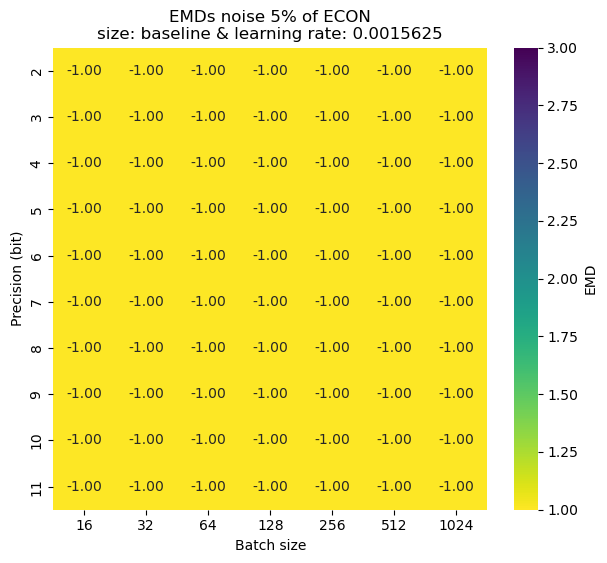

In [412]:
for jreg_percentage in jreg_percentages:
    for lr in learning_rates:
        matrix = np.zeros((len(precisions), len(batch_sizes)))
        noise_matrix = np.zeros((len(precisions), len(batch_sizes)))
        for y, bs in enumerate(batch_sizes):
            for x, p in enumerate(precisions):
                
                # get the performances with and without noise
                mean_emd = get_emd(DATA_PATH, bs, lr, p, size, percentage=jreg_percentage)
                noisy_emd = get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, percentage, jreg_percentage)
                
                # build the heatmap matrix
                matrix[x, y] = mean_emd
                noise_matrix[x, y] = noisy_emd

                
        # plot the heatmaps per precision
        matrix = pd.DataFrame(matrix, 
                            index=precisions, 
                            columns=batch_sizes)
        noise_matrix = pd.DataFrame(noise_matrix, 
                              index=precisions, 
                              columns=batch_sizes)
        print(80*'-')
        plot_2d_heatmap(matrix, 
                        f'EMDs of ECON with {jreg_percentage} of Jacobian regularization \nsize: {size} & learning rate: {lr}', 
                        (1, 3),
                        'Batch size',
                        'Precision (bit)',
                        'EMD',
                        cmap='viridis_r')
        
        plot_2d_heatmap(noise_matrix, 
                        f'EMDs noise 5% of ECON\nsize: {size} & learning rate: {lr}', 
                        (1, 3),
                        'Batch size',
                        'Precision (bit)',
                        'EMD',
                        cmap='viridis_r')
        

# RN08 (TinyResNet)
Computer vision tasks trained on CIFAR10

In [413]:
# search space
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [414]:
DATA_PATH="/data/tbaldi/work/checkpoint/"   
DATASET_DIR = "/data/tbaldi/work/loss_landscape_taxonomy/data/RN08/"

## Accuracy results

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_2b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_2b/accuracy_1.tx

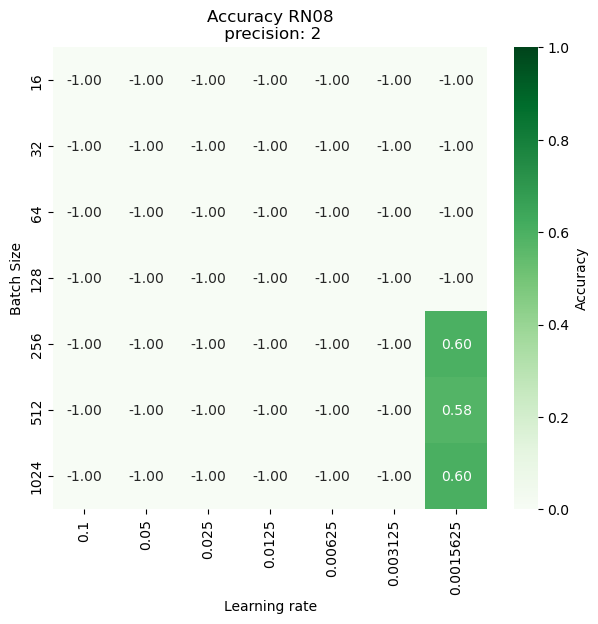

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_3b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_3b/accuracy_1.tx

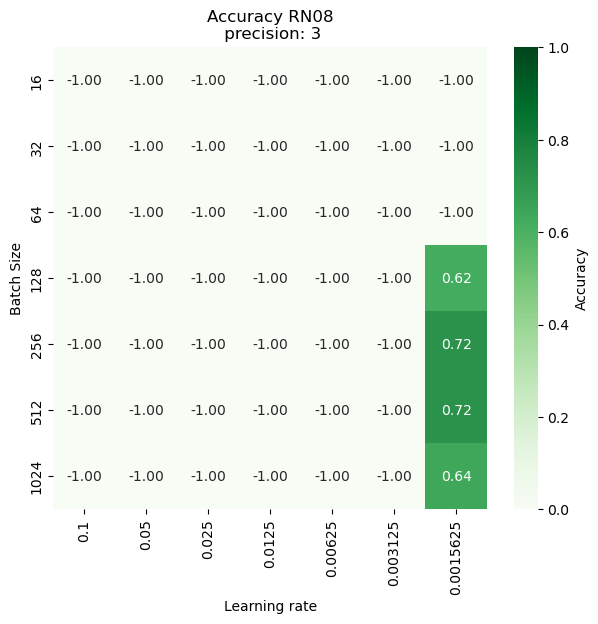

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_4b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_4b/accuracy_1.tx

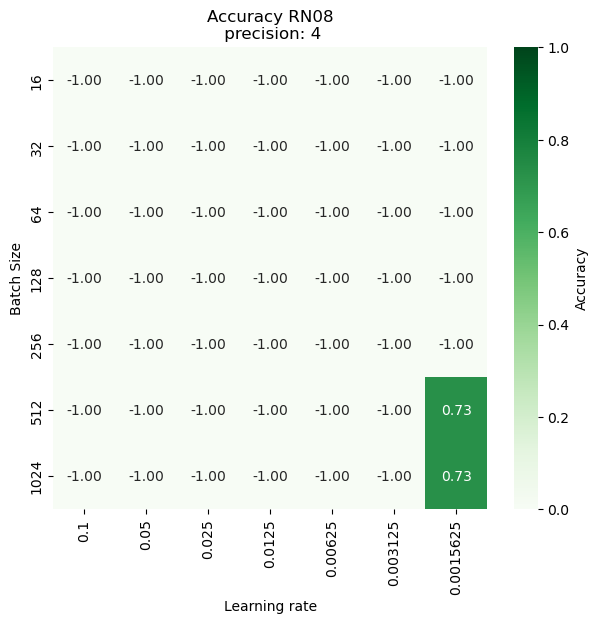

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_5b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_5b/accuracy_1.tx

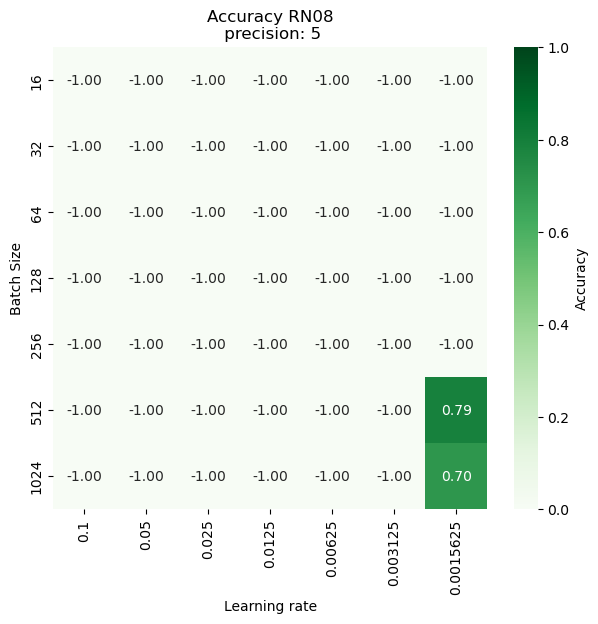

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_6b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_6b/accuracy_1.tx

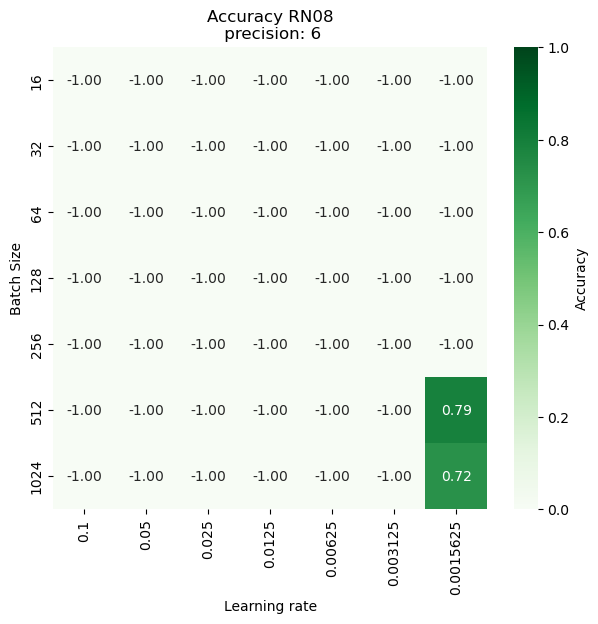

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_7b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_7b/accuracy_1.tx

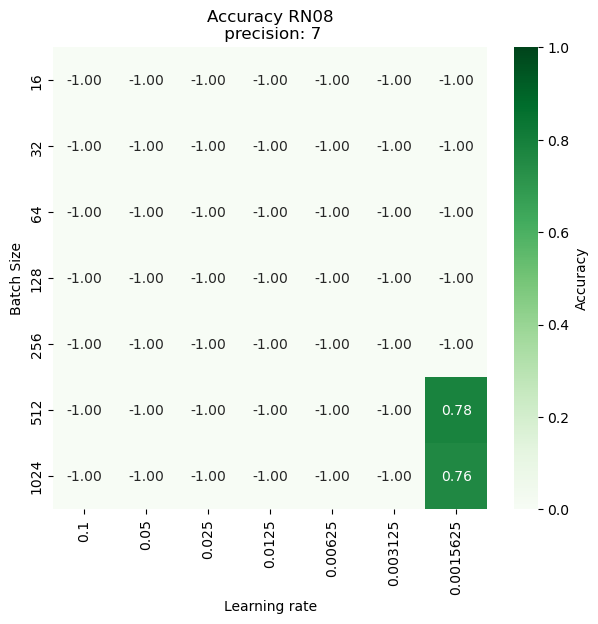

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_8b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_8b/accuracy_1.tx

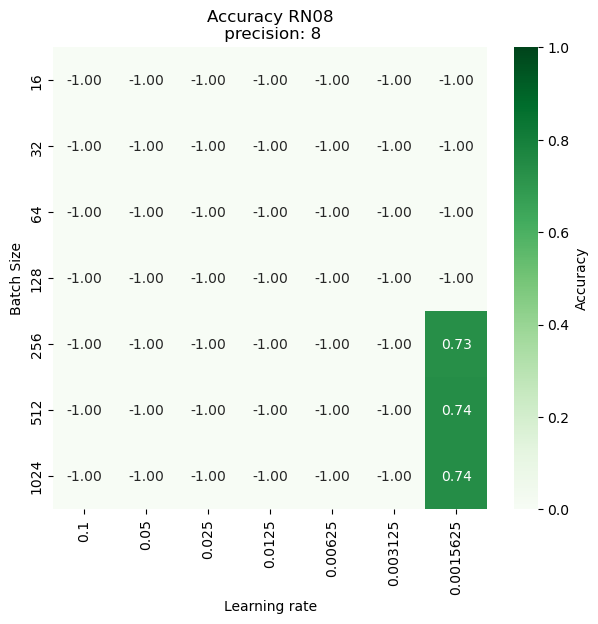

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_9b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_9b/accuracy_1.tx

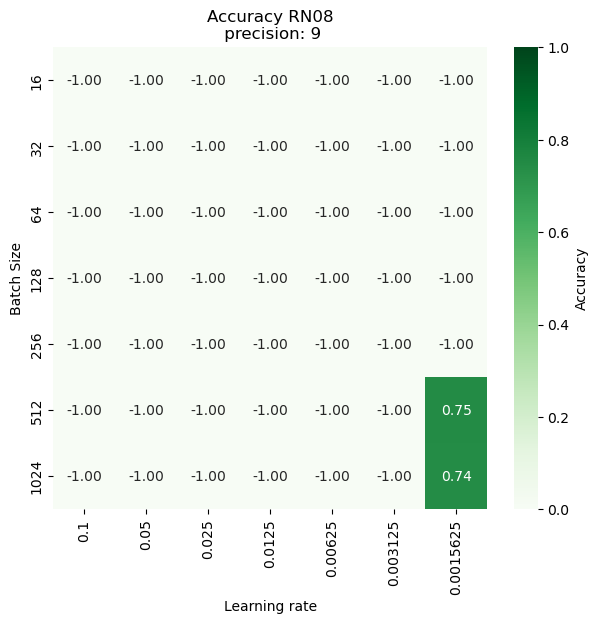

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_10b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_10b/a

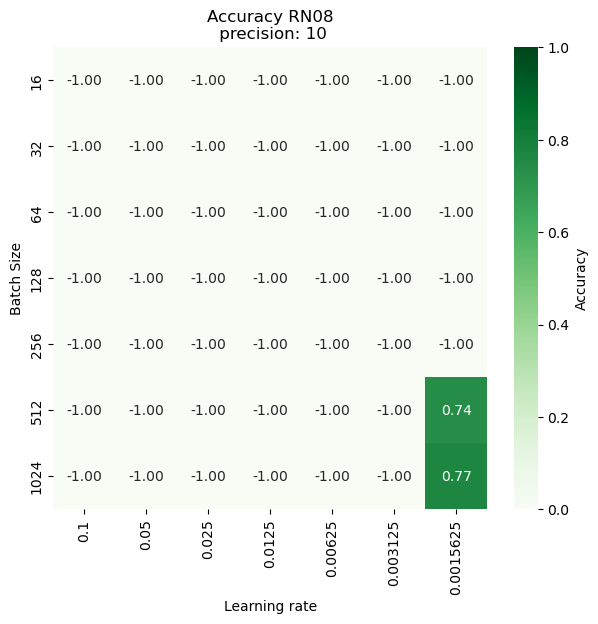

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.05/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.025/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.0125/RN08_11b/accuracy_1.txt)
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.00625/RN08_11b/a

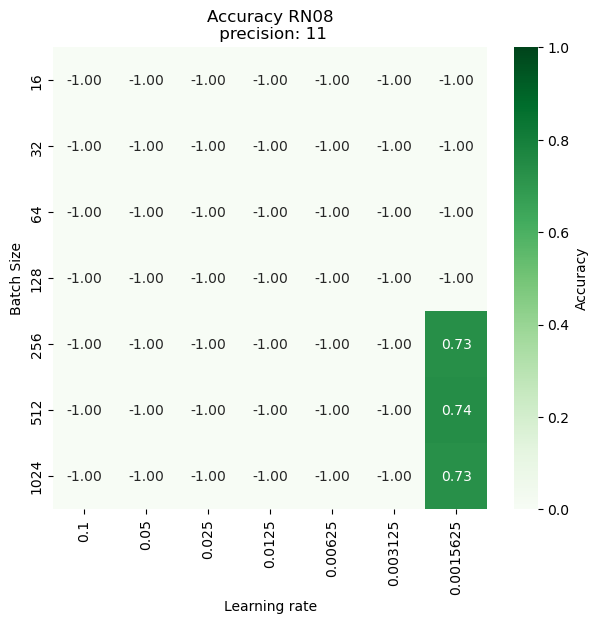

In [415]:
# plotting a heat map per layer
for p in precisions:
    matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            matrix[x, y] = acc
            
            
    matrix = pd.DataFrame(matrix, 
                          index=batch_sizes, 
                          columns=learning_rates)
    
    plot_2d_heatmap(matrix, 
                    f'Accuracy RN08\n precision: {p}', 
                    (0, 1),
                    'Learning rate',
                    'Batch Size',
                    'Accuracy',
                    cmap='Greens')

## Scientific Benchmark

In [416]:

noise_type = "pixelate"
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_pixelate.txt not found

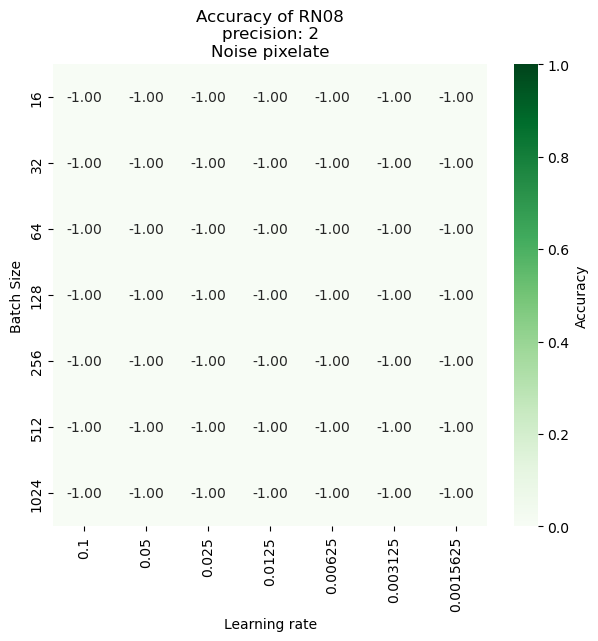

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_pixelate.txt not found

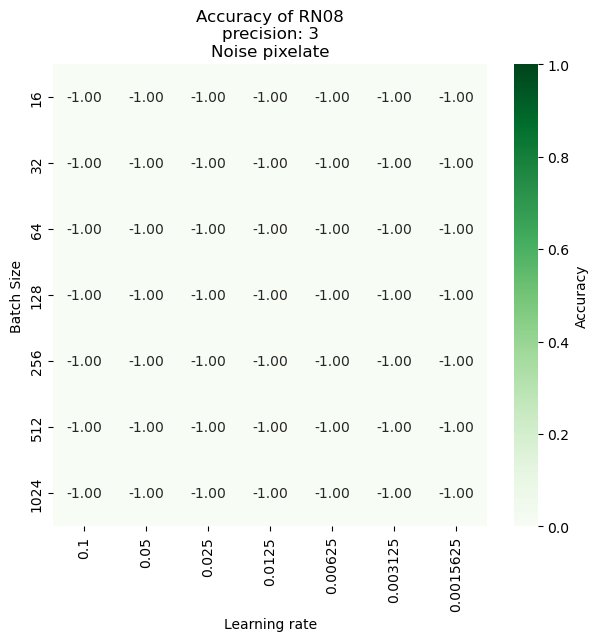

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_pixelate.txt not found

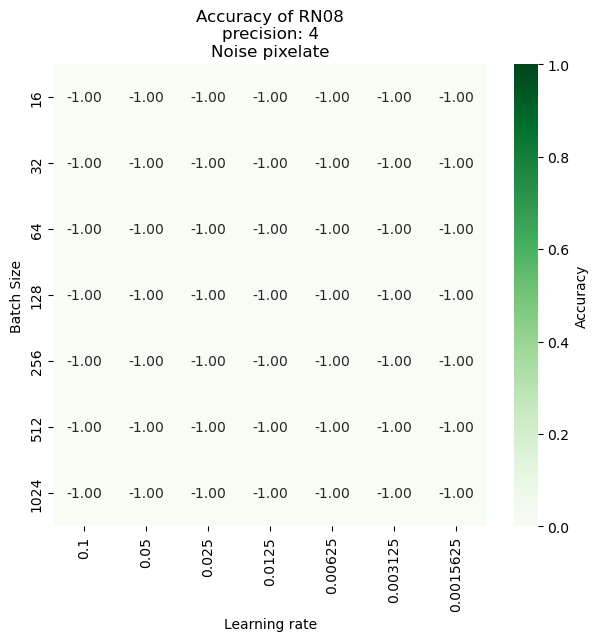

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_pixelate.txt not found

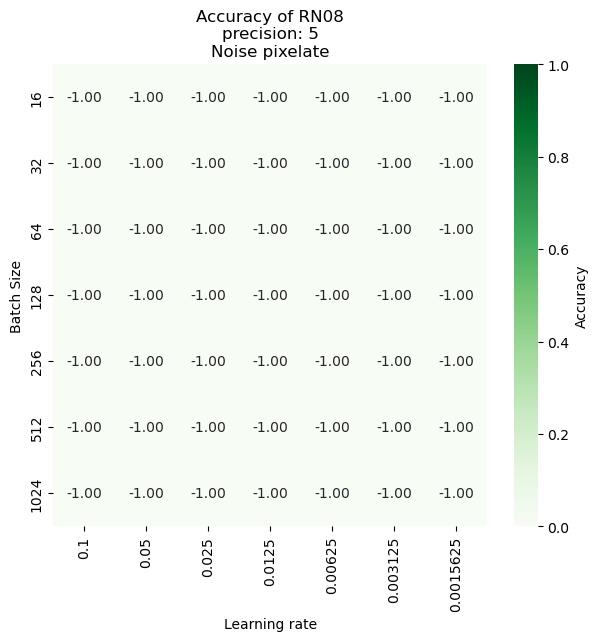

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_pixelate.txt not found

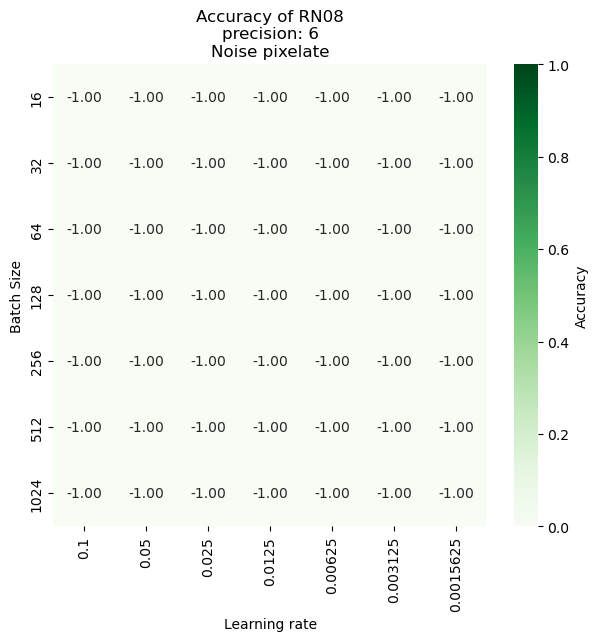

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/accuracy_pixelate.txt not found

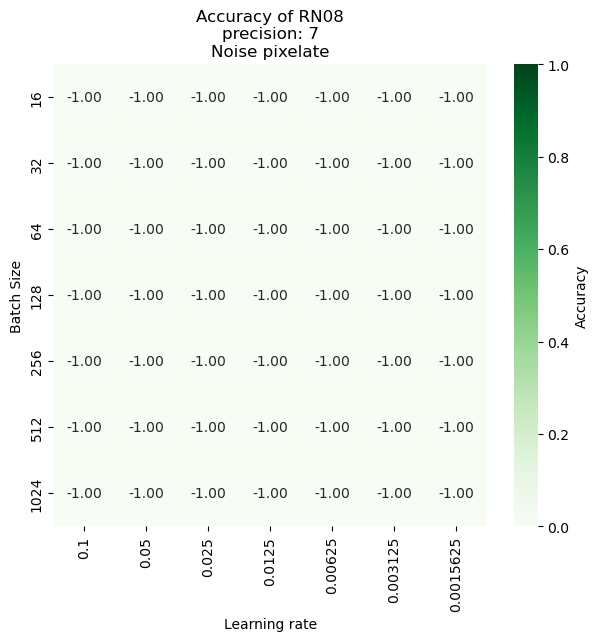

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_8b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_8b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_8b/accuracy_pixelate.txt not found

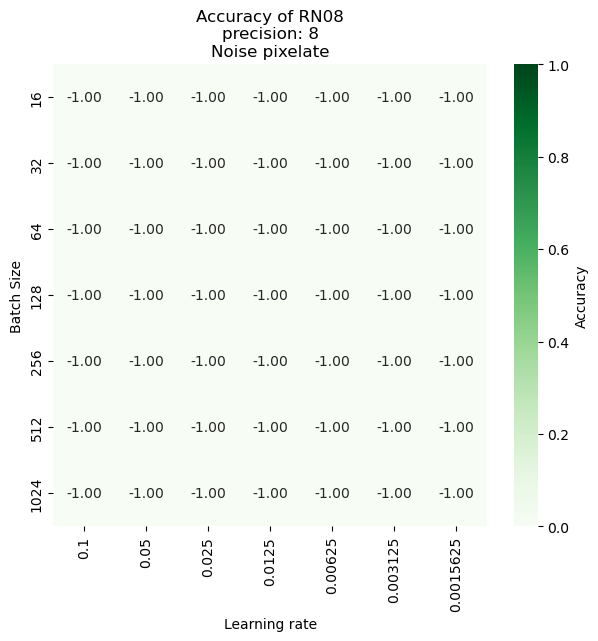

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_9b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_9b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_9b/accuracy_pixelate.txt not found

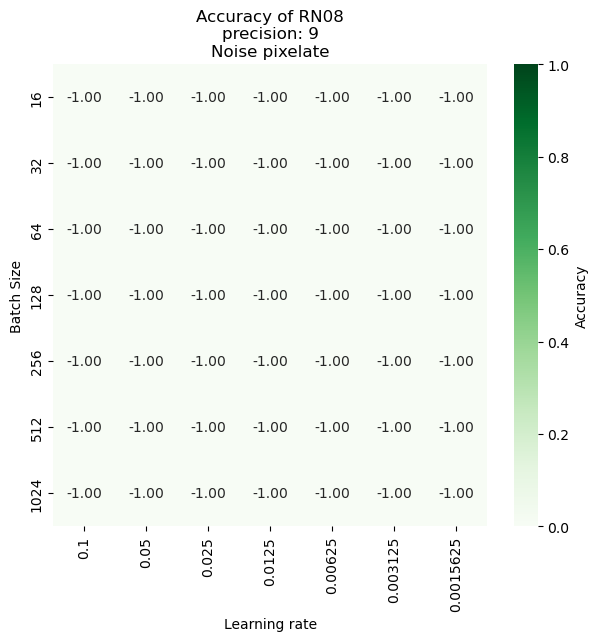

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_10b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_10b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_10b/accuracy_pixelate.t

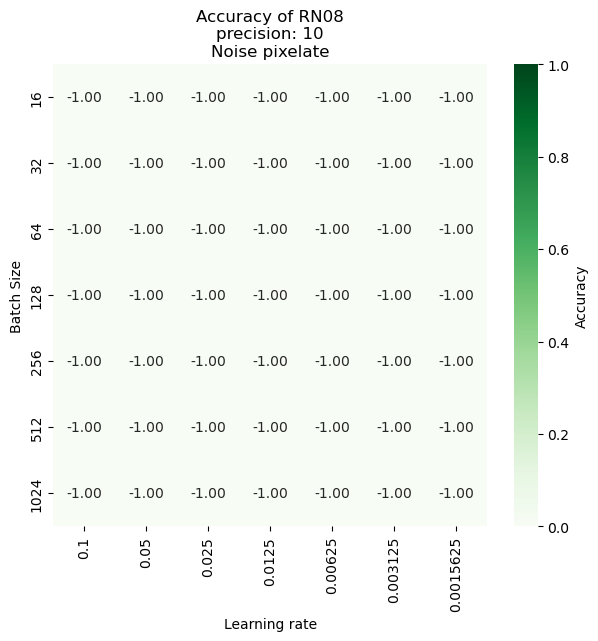

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_11b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_11b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_11b/accuracy_pixelate.t

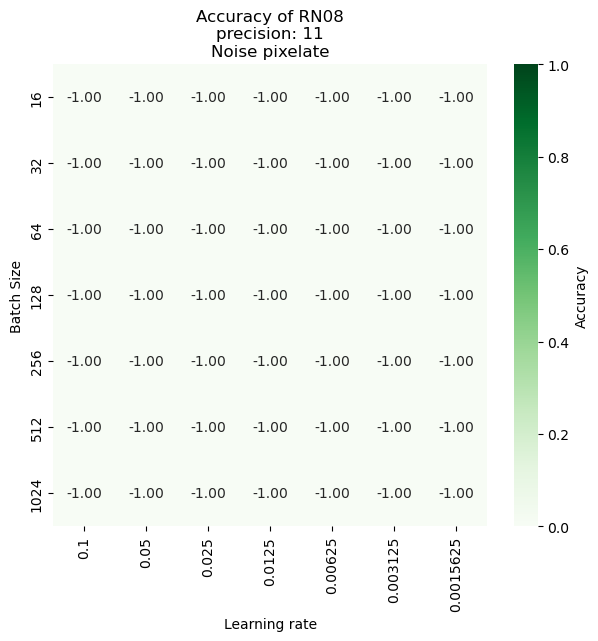

In [417]:
acc_distribution = []
for p in precisions:
    matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            noise_acc = rn08.get_accuracy_with_noise(DATA_PATH, bs, lr, p, noise_type)
            
            matrix[x, y] = noise_acc
            
            acc_distribution.append({
                'precision': p, 
                'accuracy': acc,
                'noise accuracy': noise_acc,
                'batch_size': str(bs),
                'learning_rate': str(lr),
                'precision': p,
            })
            
    matrix = pd.DataFrame(matrix,
                          index=batch_sizes,
                          columns=learning_rates)
    
    plot_2d_heatmap(matrix, 
                    f'Accuracy of RN08\nprecision: {p}\n' \
                    f'Noise {noise_type}', 
                    (0, 1),
                    'Learning rate',
                    'Batch Size',
                    'Accuracy',
                    cmap='Greens')

In [418]:
acc_distribution_df = pd.DataFrame(acc_distribution)
# export the CSV
acc_distribution_df.to_csv("./results/rn08/noise.csv", index=False)

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbald

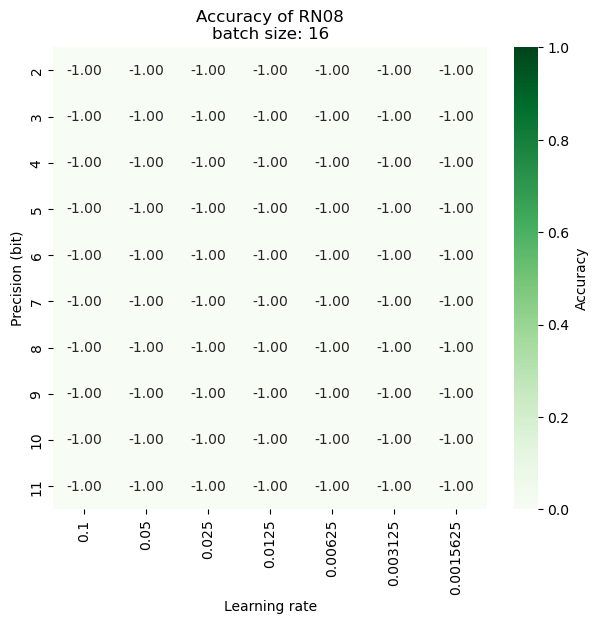

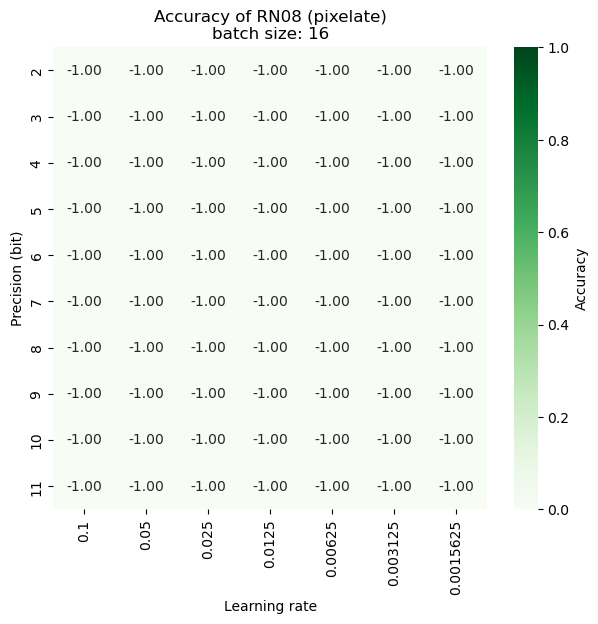

File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs32_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbald

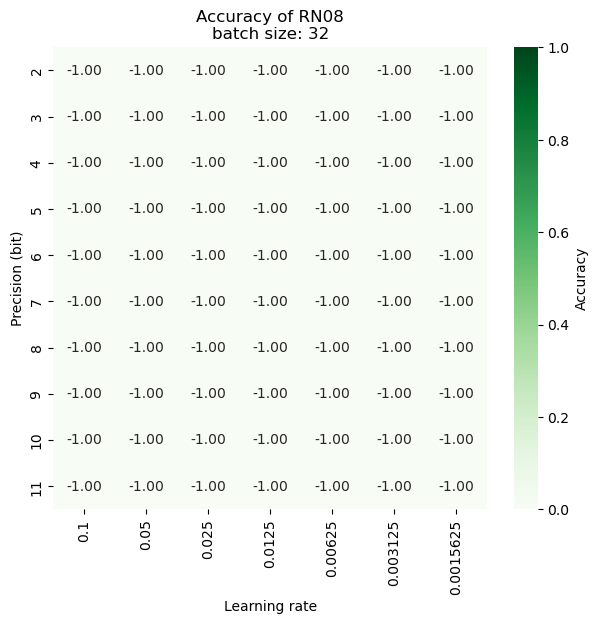

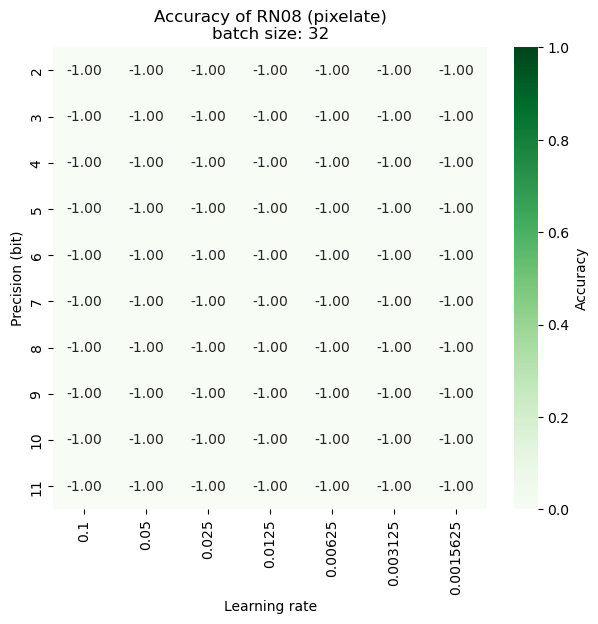

File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs64_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbald

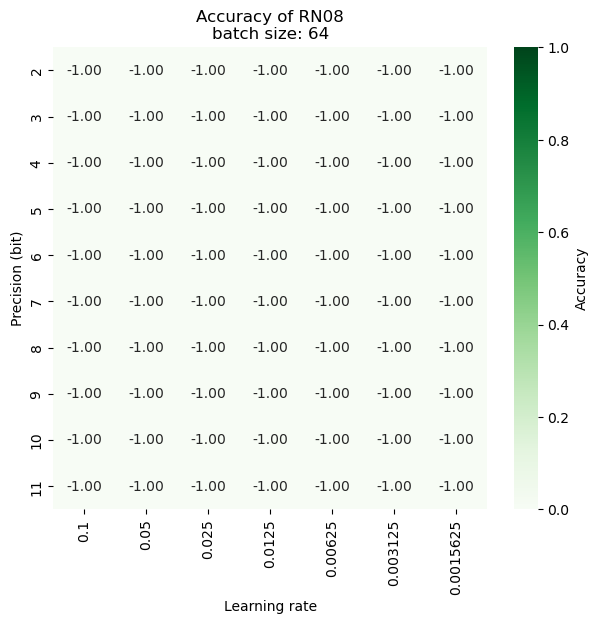

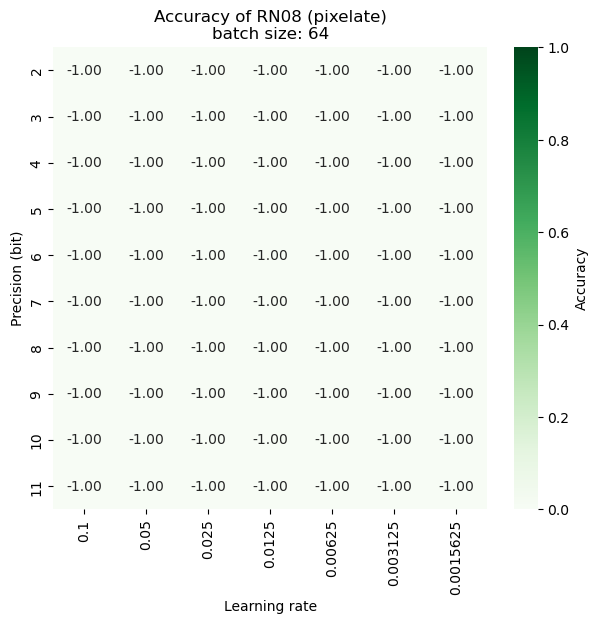

File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs128_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! 

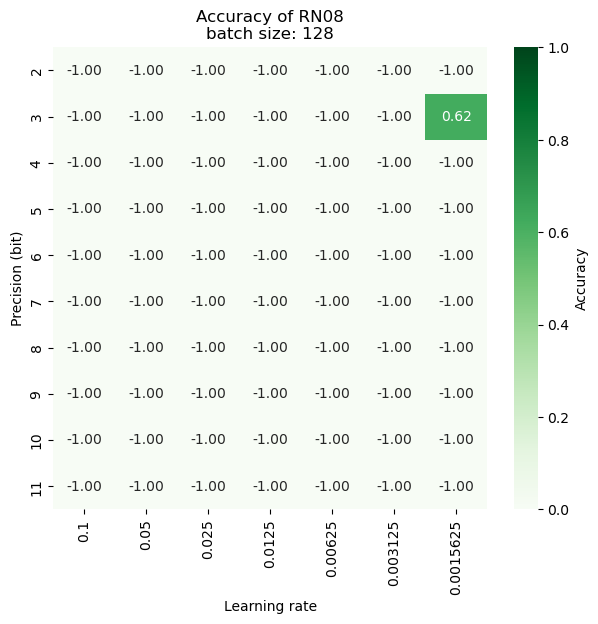

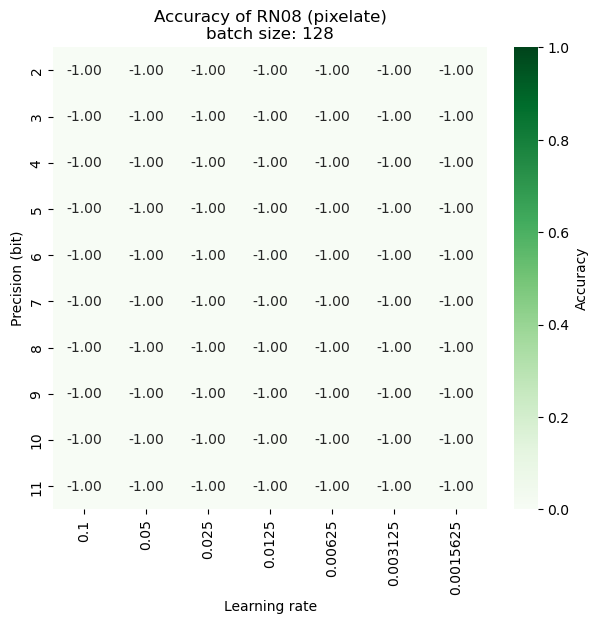

File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs256_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! 

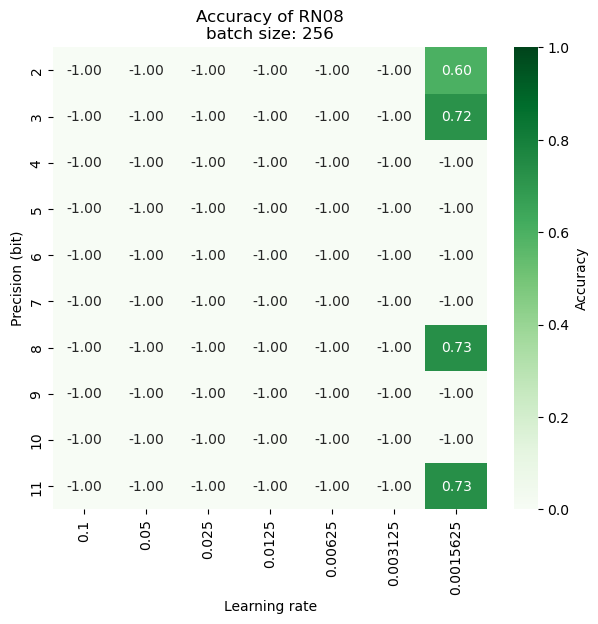

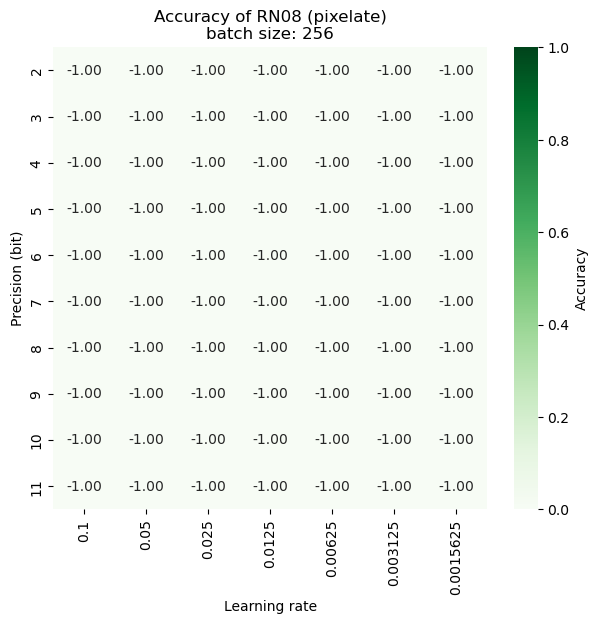

File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs512_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! 

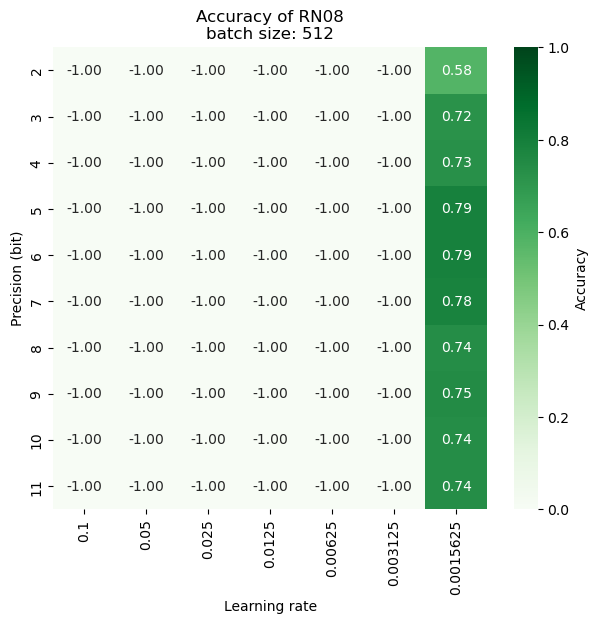

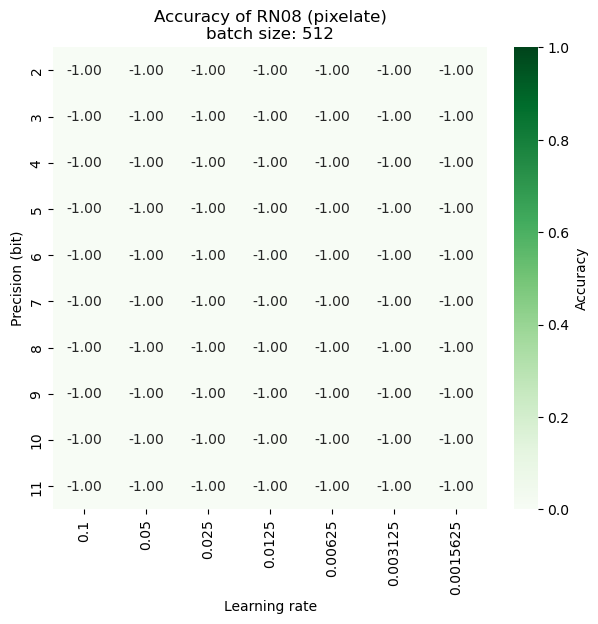

File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs1024_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File

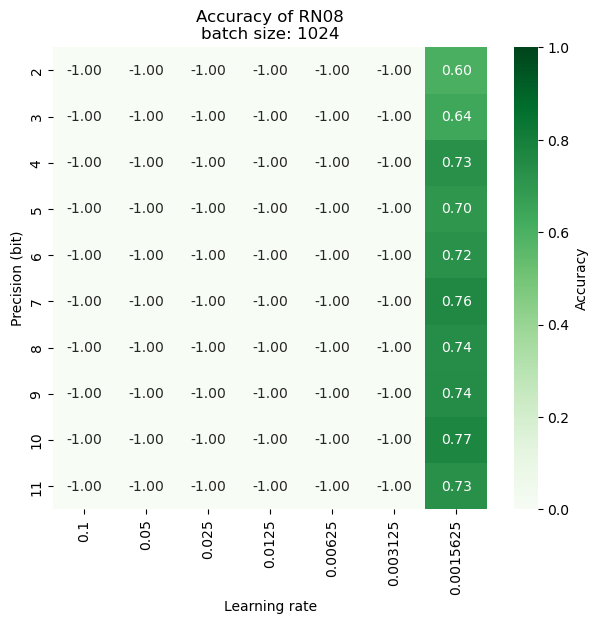

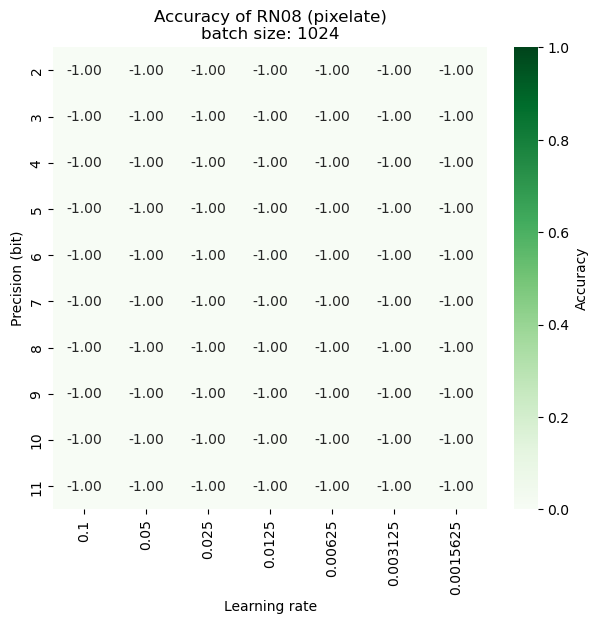

In [419]:

for bs in batch_sizes:
    matrix = np.zeros((len(precisions), len(learning_rates)))
    noise_matrix = np.zeros((len(precisions), len(learning_rates)))
    for y, lr in enumerate(learning_rates):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            noise_acc = rn08.get_accuracy_with_noise(DATA_PATH, bs, lr, p, noise_type)
            
            # build the heatmap matrix
            matrix[x, y] = acc
            noise_matrix[x, y] = noise_acc

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=learning_rates)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=learning_rates)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'Accuracy of RN08\nbatch size: {bs}', 
                    (0, 1),
                    'Learning rate',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='Greens')
    
    plot_2d_heatmap(noise_matrix, 
                    f'Accuracy of RN08 ({noise_type})\nbatch size: {bs}', 
                    (0, 1),
                    'Learning rate',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='Greens')

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.1/RN08_7b/accuracy_pixelate.txt not found!
File not found! (/data/tbald

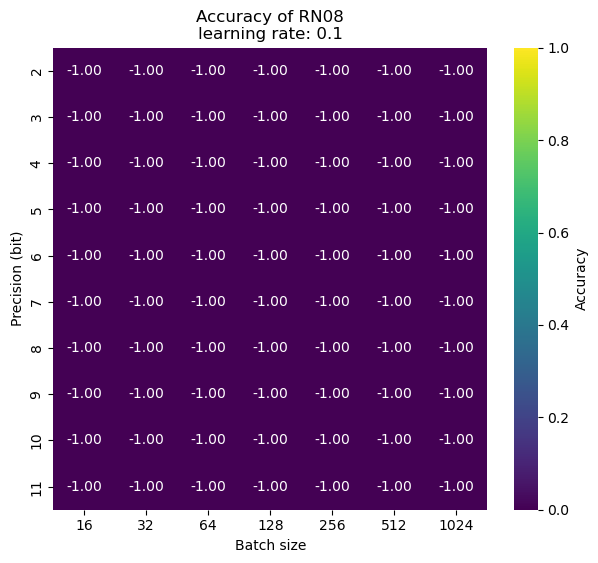

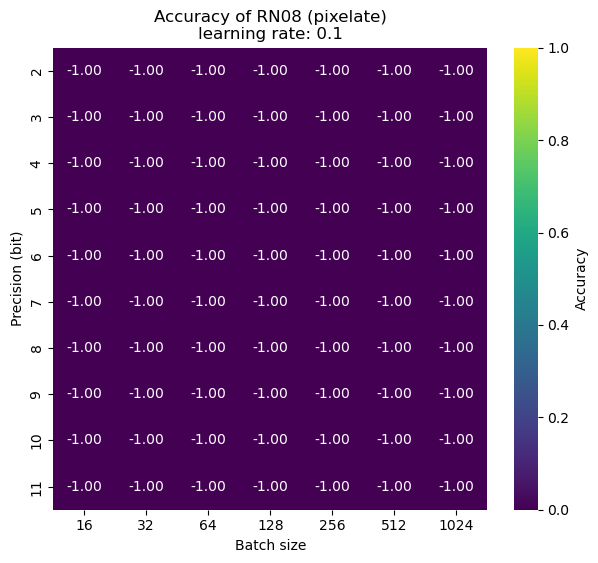

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.05/RN08_7b/accuracy_pixelate.txt not found!
File not found! 

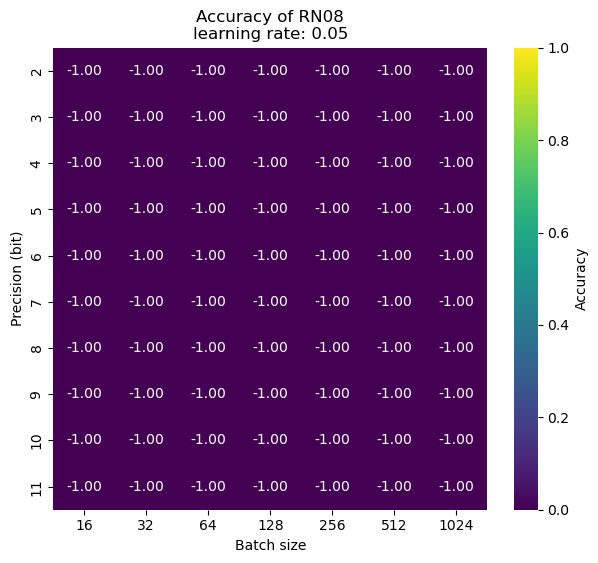

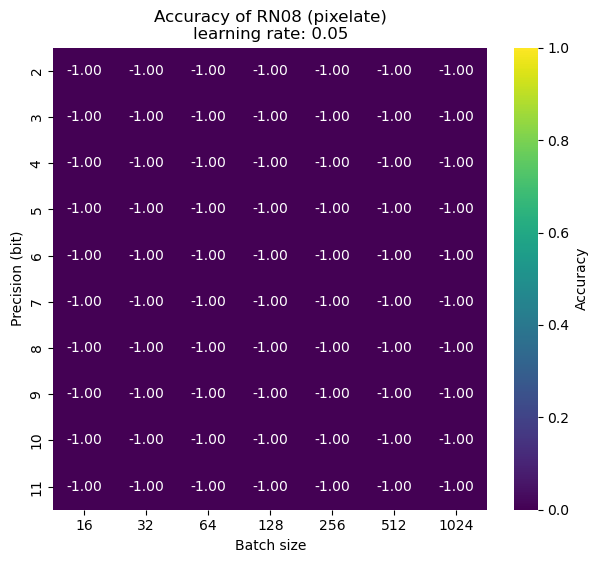

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.025/RN08_7b/accuracy_pixelate.txt not found!
File

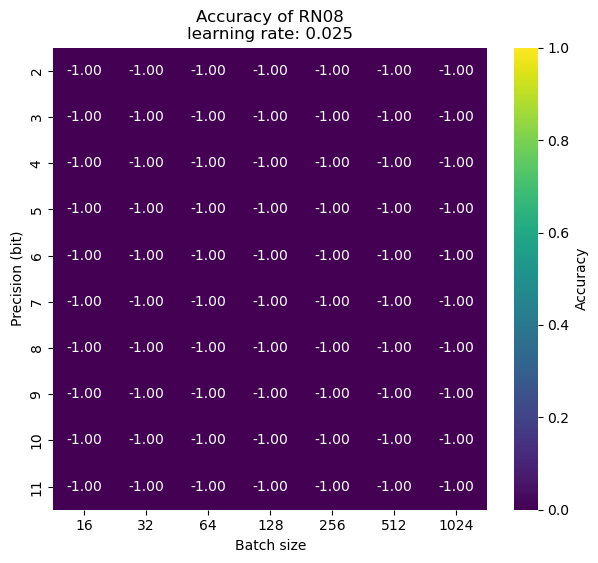

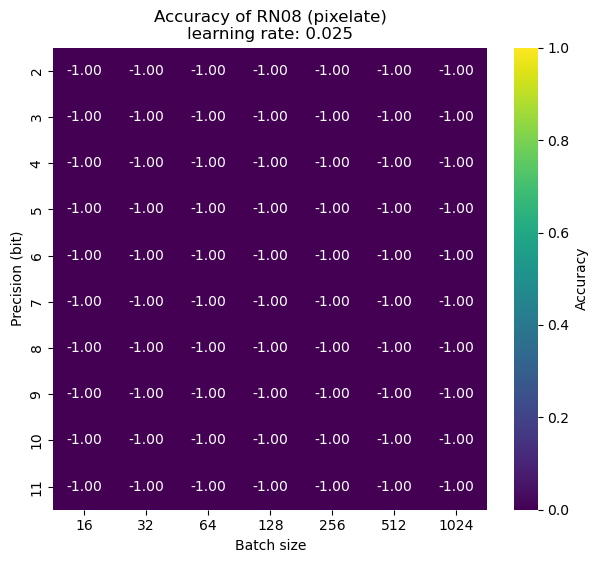

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0125/RN08_7b/accuracy_pixelate.txt not

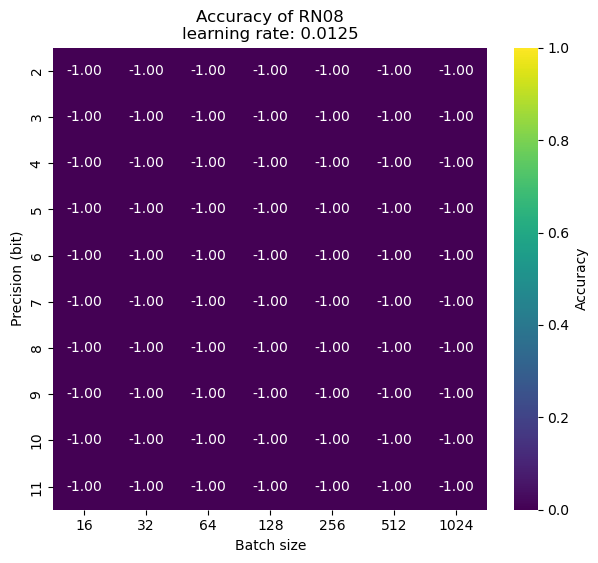

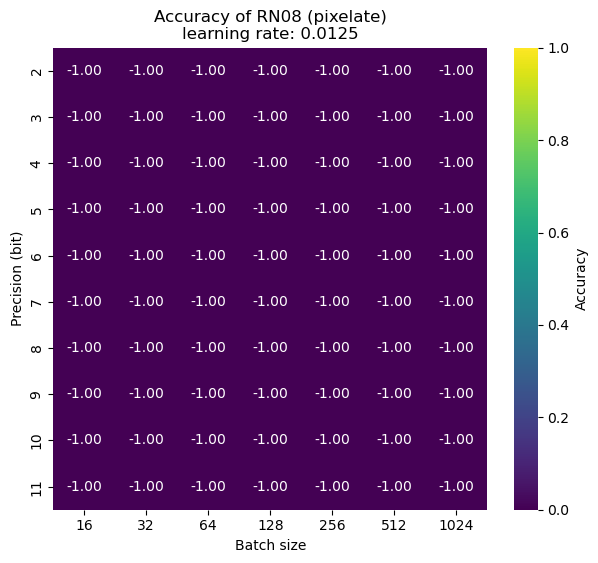

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00625/RN08_7b/accuracy_pixe

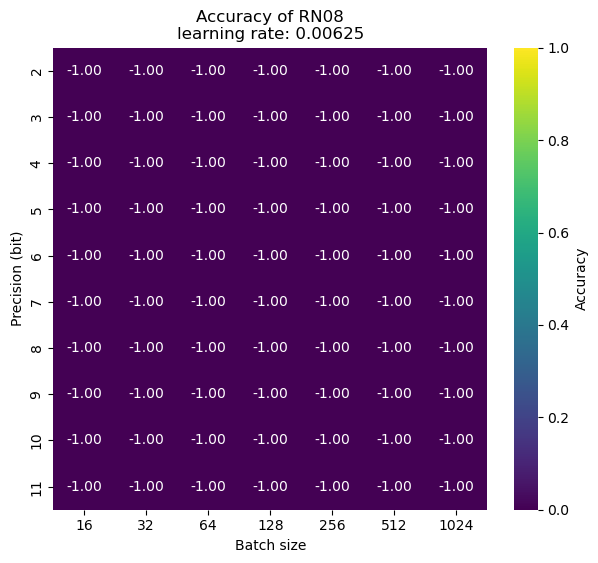

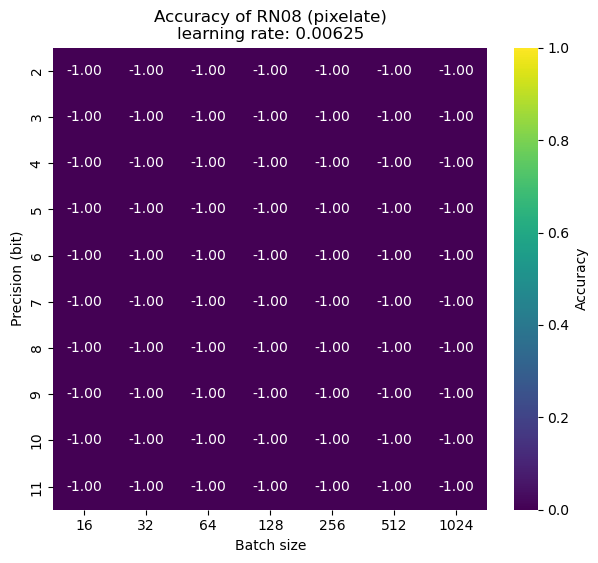

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.003125/RN08_7b/a

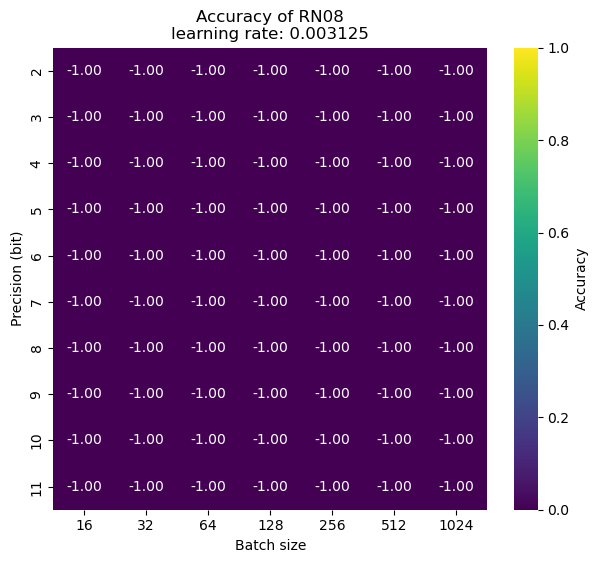

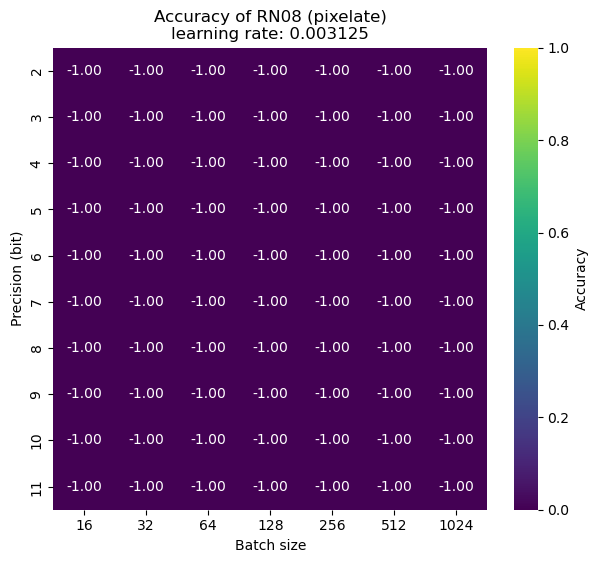

File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_2b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_2b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_3b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_3b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_4b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_4b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_5b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_5b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_6b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_6b/accuracy_pixelate.txt not found!
File not found! (/data/tbaldi/work/checkpoint/bs16_lr0.0015625/RN08_7b/accuracy_1.txt)
/data/tbaldi/work/checkpoint/bs16_lr0.00156

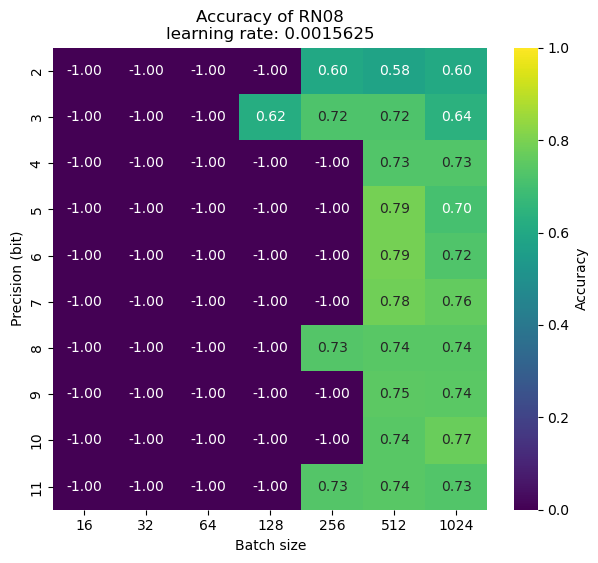

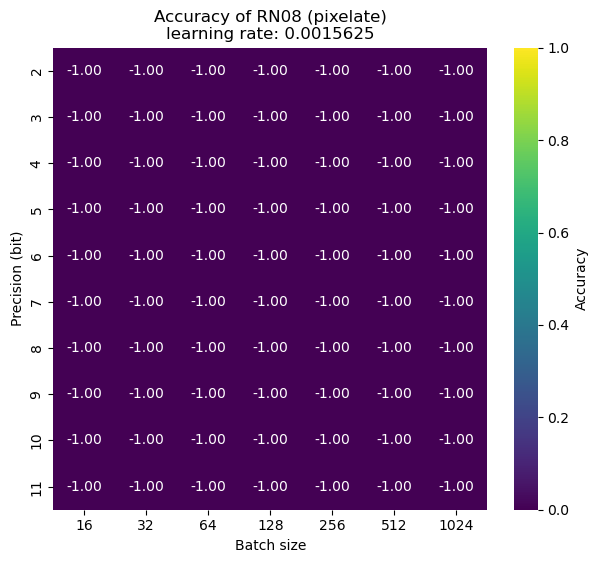

In [420]:

for lr in learning_rates:
    matrix = np.zeros((len(precisions), len(learning_rates)))
    noise_matrix = np.zeros((len(precisions), len(learning_rates)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):
            
            # get the performances with and without noise
            acc = rn08.get_accuracy(DATA_PATH, bs, lr, p)
            noise_acc = rn08.get_accuracy_with_noise(DATA_PATH, bs, lr, p, noise_type)
            
            # build the heatmap matrix
            matrix[x, y] = acc
            noise_matrix[x, y] = noise_acc

            
    # plot the heatmaps per precision
    matrix = pd.DataFrame(matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    noise_matrix = pd.DataFrame(noise_matrix, 
                          index=precisions, 
                          columns=batch_sizes)
    print(80*'-')
    plot_2d_heatmap(matrix, 
                    f'Accuracy of RN08\nlearning rate: {lr}', 
                    (0, 1),
                    'Batch size',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='viridis')
    
    plot_2d_heatmap(noise_matrix, 
                    f'Accuracy of RN08 ({noise_type})\nlearning rate: {lr}', 
                    (0, 1),
                    'Batch size',
                    'Precision (bit)',
                    'Accuracy',
                    cmap='viridis')